### Notebook 3-2
# Clasificación: reto opcional

## Se pide:

Se deberán probar todos los modelos posibles para cada uno de los siguientes problemas de negocio, industrializando en el paquete solamente el mejor de ellos para cada uno de los casos, con los mejores hiperparámetros y transformaciones previas encontradas.

<b>Clasificación</b>:<br>
<b>Reto opcional</b>:<br>
Crear un algoritmo de clasificación que intente averiguar lo mejor posible si los comentarios o los ratings estarán deshabilitados por parte del creador del vídeo en base al resto de la información. Al ser una clasificación altamente desbalanceada se valorará no solo obtener una alta precisión, sino también estudiar en una matriz de confusión si se sega excesivamente hacia la clase mayoritaria y en el caso de que ocurra intentar mitigar este hecho.<br>

## Importaciones

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

## Carga de datos
Carga del fichero de datos generado al final del EDA.

In [2]:
df = pd.read_csv('..//data//processed//csv_eda.csv', index_col=0)

In [3]:
df.columns

Index(['title', 'channel_title', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'comments_disabled', 'ratings_disabled', 'category',
       'country', 'trending_date_year', 'trending_date_month',
       'publish_time_year', 'publish_time_month', 'ratio_viralidad',
       'ratio_interaccion_dia', 'publish_trending_days',
       'channel_title_encoded', 'tags_encoded', 'category_encoded',
       'country_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded',
       'comment_count_encoded', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded'],
      dtype='object')

Eliminamos la variable title, que no la vamos a usar.

In [4]:
df = df.drop('title', axis='columns')

In [5]:
df

,channel_title,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,category,country,...,country_encoded,views_encoded,likes_encoded,dislikes_encoded,comment_count_encoded,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded
0,EminemVEVO,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,False,False,Music,CA,...,0,2.195188,4.501606,1.803614,4.773962,4.334115,-1.823782,0.909091,-1.758901,0.909091
1,iDubbbzTV,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,False,False,Comedy,CA,...,0,-0.046118,0.536588,-0.020748,0.342217,0.455009,-1.823782,0.909091,-1.758901,0.909091
2,Rudy Mancuso,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,False,False,Comedy,CA,...,0,0.256091,0.646234,0.138859,0.151795,0.536320,-1.823782,0.909091,-1.758901,0.909091
3,nigahiga,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,False,False,Entertainment,CA,...,0,0.103985,0.563307,-0.007590,0.518462,0.499064,-1.823782,0.909091,-1.758901,0.909091
4,Ed Sheeran,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,False,False,Music,CA,...,0,4.467192,9.591119,0.827083,3.171140,8.064620,-1.823782,0.909091,-1.758901,0.909091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,AaronsAnimals,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,False,False,Pets & Animals,US,...,9,0.047033,-0.002199,-0.033994,-0.065135,-0.007461,0.548311,0.454545,0.568537,0.363636
375938,zefrank1,[none],1064798,60008,382,3936,False,False,People & Blogs,US,...,9,-0.039156,0.129129,-0.077842,-0.014908,0.106531,0.548311,0.454545,0.568537,0.363636
375939,Brad Mondo,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,False,False,Entertainment,US,...,9,-0.038926,0.057358,-0.049426,-0.012709,0.048649,0.548311,0.454545,0.568537,0.363636
375940,How It Should Have Ended,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,False,False,Film & Animation,US,...,9,0.598922,0.928280,0.029875,0.344494,0.850929,0.548311,0.454545,0.568537,0.363636


# Crear un clasificador que prediga si los comentarios o los ratings están deshabilitados.

Nuestras variables objetivo van a ser 'comment_disabled' y 'ratings_disabled'. Vamos a comenzar estudiando estas variables.

### Variables objetivo

- <b>comment_disabled</b>

Variable categórica binaria, casi un 98% de False.<br>
Variable muy desbalanceada.

In [6]:
df['comments_disabled'].value_counts(normalize=True)

comments_disabled
False    0.978263
True     0.021737
Name: proportion, dtype: float64

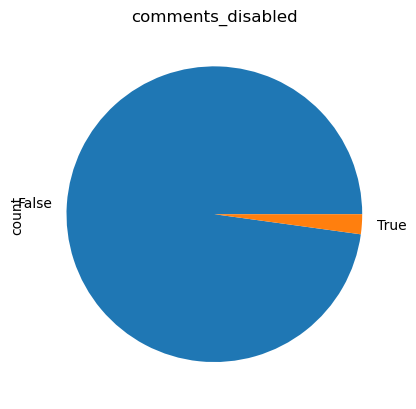

In [7]:
df['comments_disabled'].value_counts().plot.pie()
plt.title('comments_disabled')
plt.show()

- <b>ratings_disabled</b>

Variable categórica binaria, más de un 98% de False..<br>
Variable muy desbalanceada.

In [8]:
df['ratings_disabled'].value_counts(normalize=True)

ratings_disabled
False    0.981363
True     0.018637
Name: proportion, dtype: float64

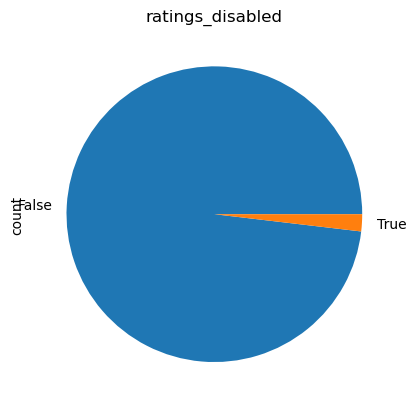

In [9]:
df['ratings_disabled'].value_counts().plot.pie()
plt.title('ratings_disabled')
plt.show()

# Preprocesamiento de datos

No vamos a hacer el estudio de la relación entre las variables y pasamos directamente a preparar el dataset para aplicar los algoritmos de Machine Learning.

In [10]:
df.columns

Index(['channel_title', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'comments_disabled', 'ratings_disabled', 'category', 'country',
       'trending_date_year', 'trending_date_month', 'publish_time_year',
       'publish_time_month', 'ratio_viralidad', 'ratio_interaccion_dia',
       'publish_trending_days', 'channel_title_encoded', 'tags_encoded',
       'category_encoded', 'country_encoded', 'views_encoded', 'likes_encoded',
       'dislikes_encoded', 'comment_count_encoded',
       'ratio_interaccion_dia_encoded', 'trending_date_year_encoded',
       'trending_date_month_encoded', 'publish_time_year_encoded',
       'publish_time_month_encoded'],
      dtype='object')

In [11]:
X_comments = df[['channel_title_encoded', 'tags_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded', 'comment_count_encoded',\
                 'ratings_disabled', 'category_encoded', 'country_encoded', 'ratio_viralidad', 'ratio_interaccion_dia_encoded', \
                 'trending_date_year_encoded', 'trending_date_month_encoded', 'publish_time_year_encoded', 'publish_time_month_encoded', \
                 'publish_trending_days']]
X_comments

,channel_title_encoded,tags_encoded,views_encoded,likes_encoded,dislikes_encoded,comment_count_encoded,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,publish_trending_days
0,7408,15414,2.195188,4.501606,1.803614,4.773962,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,3
1,28209,87447,-0.046118,0.536588,-0.020748,0.342217,False,1,0,0.140454,0.455009,-1.823782,0.909091,-1.758901,0.909091,0
2,20687,88781,0.256091,0.646234,0.138859,0.151795,False,1,0,0.049995,0.536320,-1.823782,0.909091,-1.758901,0.909091,1
3,29088,91178,0.103985,0.563307,-0.007590,0.518462,False,3,0,0.072404,0.499064,-1.823782,0.909091,-1.758901,0.909091,1
4,7030,64232,4.467192,9.591119,0.827083,3.171140,False,8,0,0.051912,8.064620,-1.823782,0.909091,-1.758901,0.909091,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,910,51299,0.047033,-0.002199,-0.033994,-0.065135,False,12,9,0.025037,-0.007461,0.548311,0.454545,0.568537,0.363636,26
375938,30196,51138,-0.039156,0.129129,-0.077842,-0.014908,False,11,9,0.060411,0.106531,0.548311,0.454545,0.568537,0.363636,26
375939,3535,21958,-0.038926,0.057358,-0.049426,-0.012709,False,3,9,0.049784,0.048649,0.548311,0.454545,0.568537,0.363636,26
375940,10426,8106,0.598922,0.928280,0.029875,0.344494,False,4,9,0.036901,0.850929,0.548311,0.454545,0.568537,0.363636,27


In [12]:
X_ratings = df[['channel_title_encoded', 'tags_encoded', 'views_encoded', 'likes_encoded', 'dislikes_encoded', 'comment_count_encoded',\
                'comments_disabled', 'category_encoded', 'country_encoded', 'ratio_viralidad', 'ratio_interaccion_dia_encoded', \
                'trending_date_year_encoded', 'trending_date_month_encoded', 'publish_time_year_encoded', 'publish_time_month_encoded', \
                'publish_trending_days']]
X_ratings

,channel_title_encoded,tags_encoded,views_encoded,likes_encoded,dislikes_encoded,comment_count_encoded,comments_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,publish_trending_days
0,7408,15414,2.195188,4.501606,1.803614,4.773962,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,3
1,28209,87447,-0.046118,0.536588,-0.020748,0.342217,False,1,0,0.140454,0.455009,-1.823782,0.909091,-1.758901,0.909091,0
2,20687,88781,0.256091,0.646234,0.138859,0.151795,False,1,0,0.049995,0.536320,-1.823782,0.909091,-1.758901,0.909091,1
3,29088,91178,0.103985,0.563307,-0.007590,0.518462,False,3,0,0.072404,0.499064,-1.823782,0.909091,-1.758901,0.909091,1
4,7030,64232,4.467192,9.591119,0.827083,3.171140,False,8,0,0.051912,8.064620,-1.823782,0.909091,-1.758901,0.909091,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375937,910,51299,0.047033,-0.002199,-0.033994,-0.065135,False,12,9,0.025037,-0.007461,0.548311,0.454545,0.568537,0.363636,26
375938,30196,51138,-0.039156,0.129129,-0.077842,-0.014908,False,11,9,0.060411,0.106531,0.548311,0.454545,0.568537,0.363636,26
375939,3535,21958,-0.038926,0.057358,-0.049426,-0.012709,False,3,9,0.049784,0.048649,0.548311,0.454545,0.568537,0.363636,26
375940,10426,8106,0.598922,0.928280,0.029875,0.344494,False,4,9,0.036901,0.850929,0.548311,0.454545,0.568537,0.363636,27


In [13]:
y_comments = df[['comments_disabled']].copy(deep=True)
y_comments

,comments_disabled
0,False
1,False
2,False
3,False
4,False
...,...
375937,False
375938,False
375939,False
375940,False


In [14]:
y_ratings = df[['ratings_disabled']].copy(deep=True)
y_ratings

,ratings_disabled
0,False
1,False
2,False
3,False
4,False
...,...
375937,False
375938,False
375939,False
375940,False


- <b>Mapa de correlaciones</b> de todas las variables implicadas

- comments_disabled

In [15]:
X_for_corr_comments = X_comments.copy()
X_for_corr_comments['comments_disabled'] = y_comments['comments_disabled']

In [16]:
X_for_corr_comments.columns

Index(['channel_title_encoded', 'tags_encoded', 'views_encoded',
       'likes_encoded', 'dislikes_encoded', 'comment_count_encoded',
       'ratings_disabled', 'category_encoded', 'country_encoded',
       'ratio_viralidad', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded',
       'publish_trending_days', 'comments_disabled'],
      dtype='object')

In [17]:
X_for_corr_comments.head()

,channel_title_encoded,tags_encoded,views_encoded,likes_encoded,dislikes_encoded,comment_count_encoded,ratings_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,publish_trending_days,comments_disabled
0,7408,15414,2.195188,4.501606,1.803614,4.773962,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,3,False
1,28209,87447,-0.046118,0.536588,-0.020748,0.342217,False,1,0,0.140454,0.455009,-1.823782,0.909091,-1.758901,0.909091,0,False
2,20687,88781,0.256091,0.646234,0.138859,0.151795,False,1,0,0.049995,0.536320,-1.823782,0.909091,-1.758901,0.909091,1,False
3,29088,91178,0.103985,0.563307,-0.007590,0.518462,False,3,0,0.072404,0.499064,-1.823782,0.909091,-1.758901,0.909091,1,False
4,7030,64232,4.467192,9.591119,0.827083,3.171140,False,8,0,0.051912,8.064620,-1.823782,0.909091,-1.758901,0.909091,4,False


In [18]:
corr_matrix_comments = X_for_corr_comments.corr()

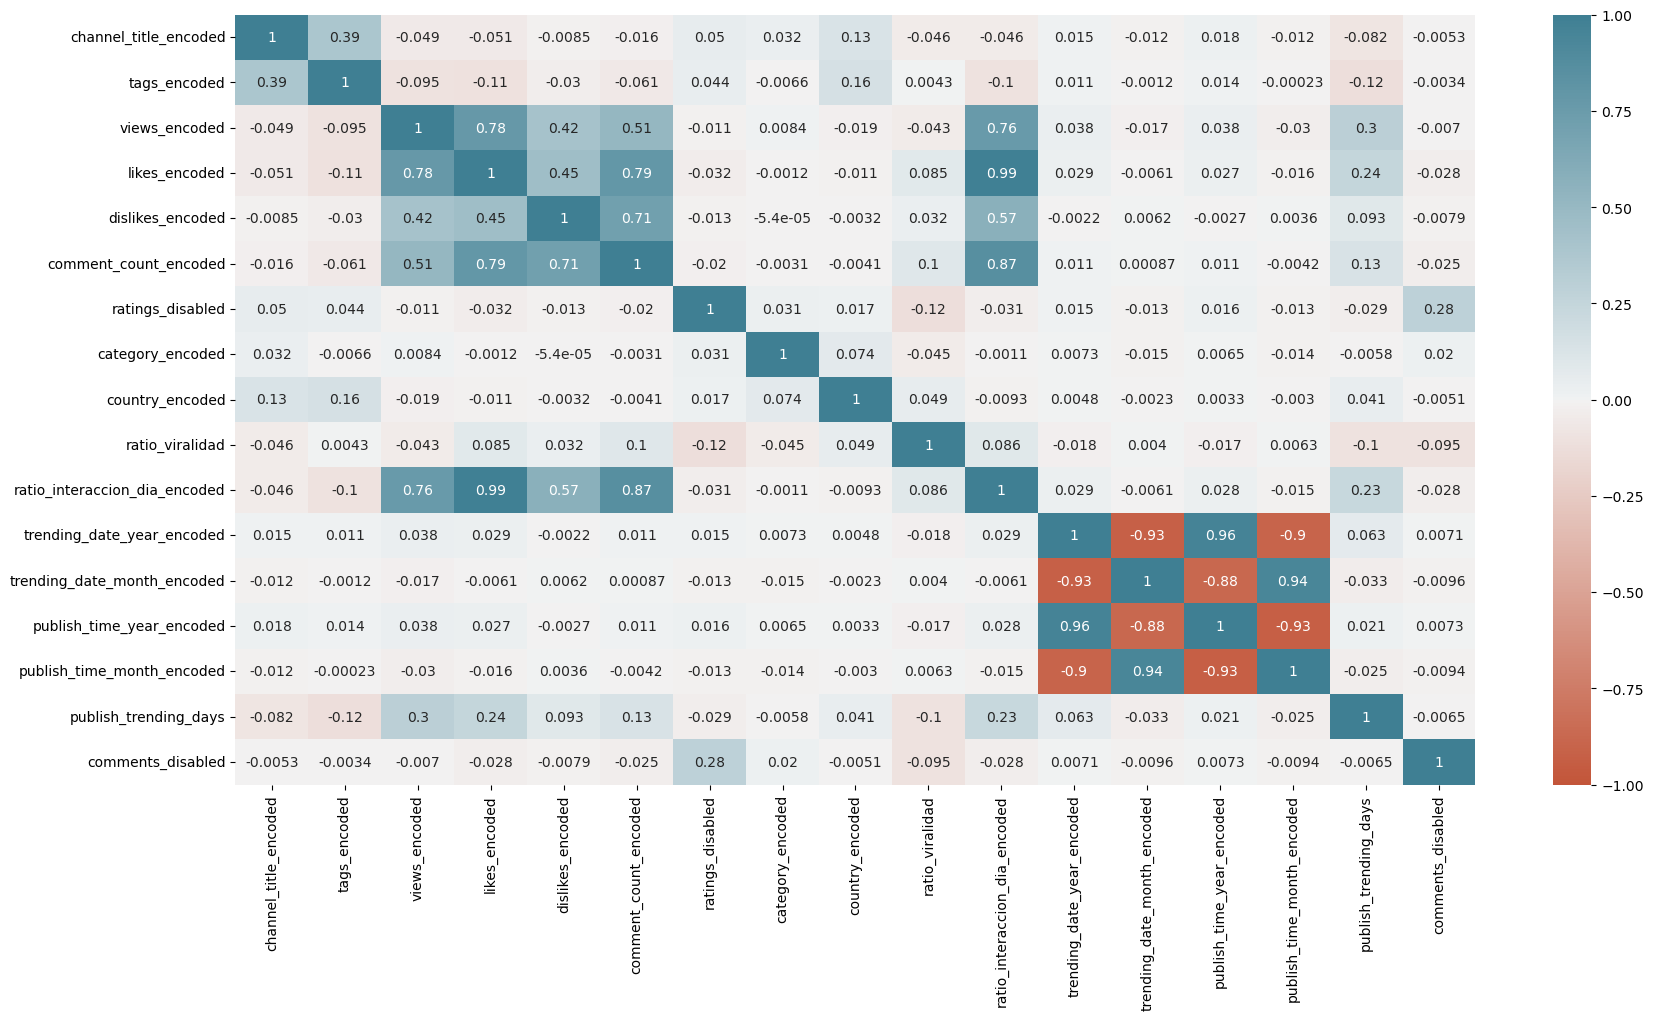

In [19]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_comments, annot=True, cmap=sns.diverging_palette(20, 220, n=256), vmin=-1, vmax=1)
plt.show()

No hay correlación lineal entre comments_disabled y las variables independientes.

- ratings_disabled

In [20]:
X_for_corr_ratings = X_ratings.copy()
X_for_corr_ratings['ratings_disabled'] = y_ratings['ratings_disabled']

In [21]:
X_for_corr_ratings.columns

Index(['channel_title_encoded', 'tags_encoded', 'views_encoded',
       'likes_encoded', 'dislikes_encoded', 'comment_count_encoded',
       'comments_disabled', 'category_encoded', 'country_encoded',
       'ratio_viralidad', 'ratio_interaccion_dia_encoded',
       'trending_date_year_encoded', 'trending_date_month_encoded',
       'publish_time_year_encoded', 'publish_time_month_encoded',
       'publish_trending_days', 'ratings_disabled'],
      dtype='object')

In [22]:
X_for_corr_ratings.head()

,channel_title_encoded,tags_encoded,views_encoded,likes_encoded,dislikes_encoded,comment_count_encoded,comments_disabled,category_encoded,country_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,trending_date_year_encoded,trending_date_month_encoded,publish_time_year_encoded,publish_time_month_encoded,publish_trending_days,ratings_disabled
0,7408,15414,2.195188,4.501606,1.803614,4.773962,False,8,0,0.055758,4.334115,-1.823782,0.909091,-1.758901,0.909091,3,False
1,28209,87447,-0.046118,0.536588,-0.020748,0.342217,False,1,0,0.140454,0.455009,-1.823782,0.909091,-1.758901,0.909091,0,False
2,20687,88781,0.256091,0.646234,0.138859,0.151795,False,1,0,0.049995,0.536320,-1.823782,0.909091,-1.758901,0.909091,1,False
3,29088,91178,0.103985,0.563307,-0.007590,0.518462,False,3,0,0.072404,0.499064,-1.823782,0.909091,-1.758901,0.909091,1,False
4,7030,64232,4.467192,9.591119,0.827083,3.171140,False,8,0,0.051912,8.064620,-1.823782,0.909091,-1.758901,0.909091,4,False


In [23]:
corr_matrix_ratings = X_for_corr_ratings.corr()

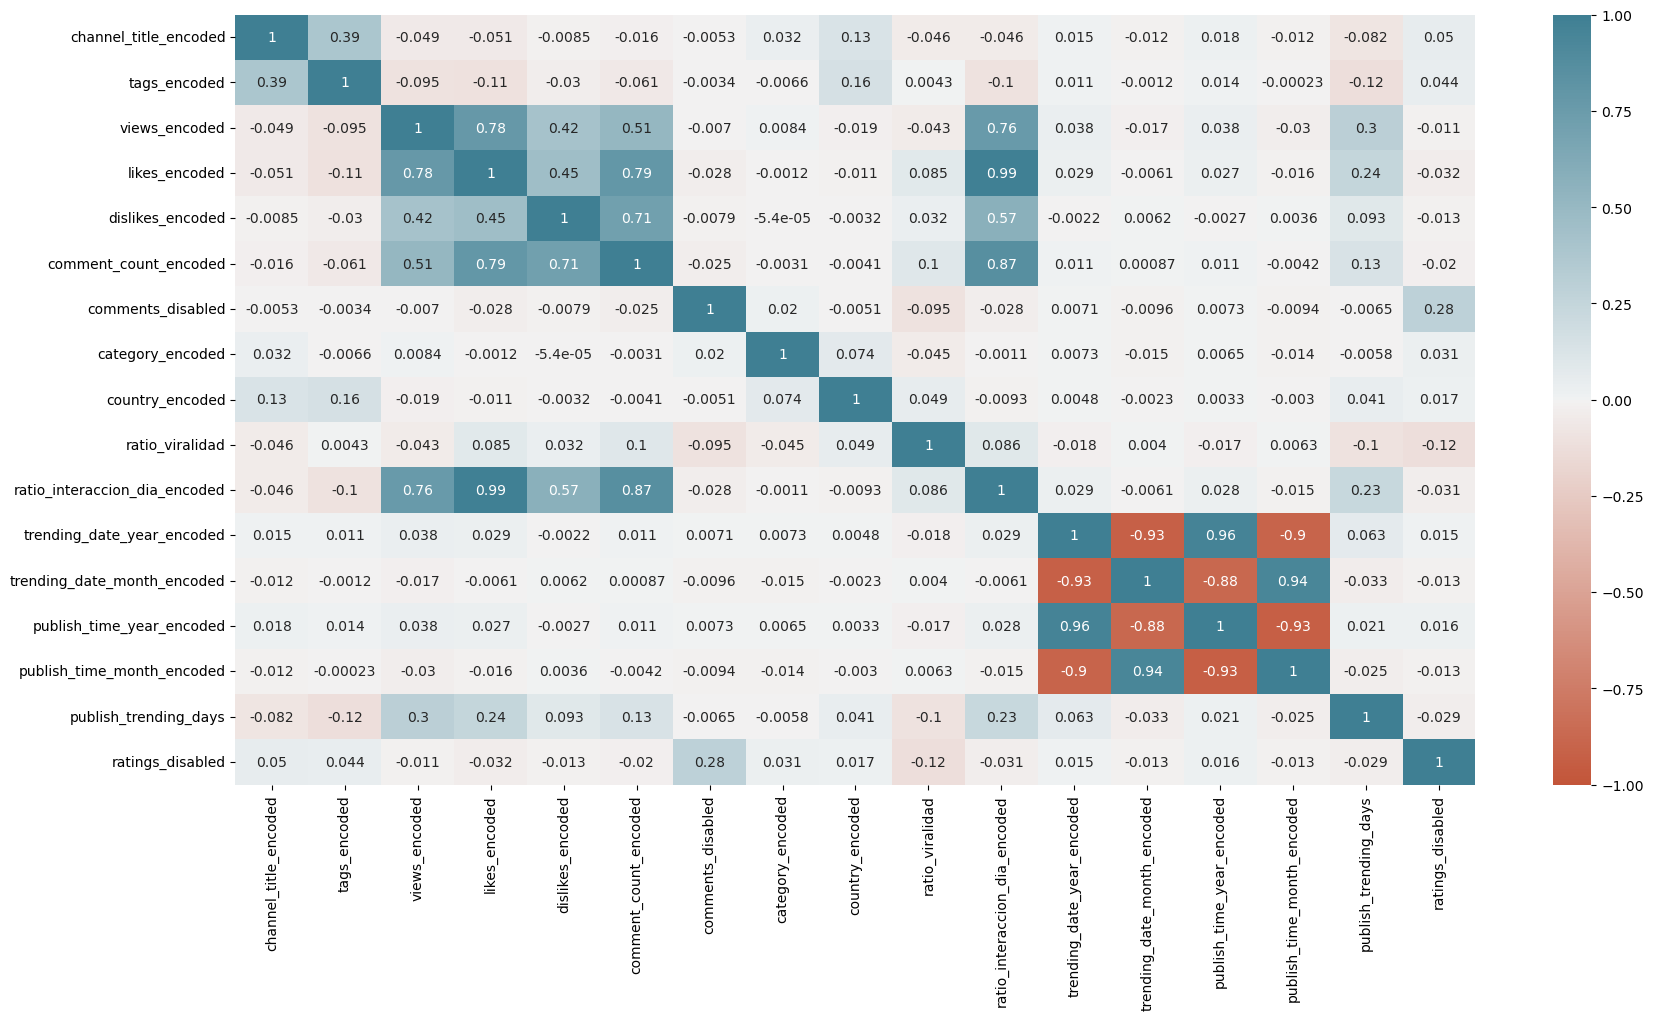

In [24]:
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix_ratings, annot=True, cmap=sns.diverging_palette(20, 220, n=256), vmin=-1, vmax=1)
plt.show()

Tampoco hay correlación lineal entre ratings_disabled y las variables independientes.

- <b>Entrenamiento y validación</b>

comments_disabled

In [25]:
X_comments_train, X_comments_test, y_comments_train, y_comments_test = train_test_split(X_comments, y_comments, test_size=0.3, random_state=42)

ratings_disabled

In [26]:
X_ratings_train, X_ratings_test, y_ratings_train, y_ratings_test = train_test_split(X_ratings, y_ratings, test_size=0.3, random_state=42)

- <b>Balancear la variable objetivo</b>

Como vimos, la variable objetivo está muy desbalanceada, por lo que los resultados de los algoritmos que apliquemos pueden estar sesgados hacia las clases mayoritarias.<br>
Algunos modelos pueden trabajar con variables desbalanceadas, indicándoselo en los parámetros, pero otros necesitarán recibir los datos ya balanceados.<br>
Vamos a balancear la variable objetivo en el conjunto de entrenamiento, y evaluaremos los modelos con el conjunto de prueba que no se va a modificar y refleja por tanto la distribución real de las clases.<br>
Para hacer el balanceo, vamos a normalizar la suma de los pesos de la muestra para cada clase al mismo valor.

- comments_disabled

In [27]:
y_comments_train

,comments_disabled
237478,False
85145,False
229682,False
160791,False
229452,False
...,...
119995,False
272332,False
132306,False
147551,False


In [28]:
y_comments_train.value_counts()

comments_disabled
False                248192
True                   5406
Name: count, dtype: int64

In [29]:
# obtenemos el número de muestras por clase
class_distribution_comments = Counter(y_comments_train['comments_disabled'])
class_distribution_comments

Counter({False: 248192, True: 5406})

In [30]:
# número total de muestras
total_samples = sum(class_distribution_comments.values())
# número de clases
num_classes = len(class_distribution_comments)
# suma de pesos por clase
sum_per_class = total_samples / num_classes
# cálculo de los pesos de cada clase
class_weight_comments = {}
for class_name, count in class_distribution_comments.items():
    class_weight_comments[class_name] = sum_per_class / count

print(class_weight_comments)

{False: 0.5108907619907168, True: 23.455234924158344}


- ratings_disabled

In [31]:
y_ratings_train

,ratings_disabled
237478,False
85145,False
229682,False
160791,False
229452,False
...,...
119995,False
272332,False
132306,False
147551,False


In [32]:
y_ratings_train.value_counts()

ratings_disabled
False               248855
True                  4743
Name: count, dtype: int64

In [33]:
# obtenemos el número de muestras por clase
class_distribution_ratings = Counter(y_ratings_train['ratings_disabled'])
class_distribution_ratings

Counter({False: 248855, True: 4743})

In [34]:
# número total de muestras
total_samples = sum(class_distribution_ratings.values())
# número de clases
num_classes = len(class_distribution_ratings)
# suma de pesos por clase
sum_per_class = total_samples / num_classes
# cálculo de los pesos de cada clase
class_weight_ratings = {}
for class_name, count in class_distribution_ratings.items():
    class_weight_ratings[class_name] = sum_per_class / count

print(class_weight_ratings)

{False: 0.5095296457776617, True: 26.73392367699768}


## Función auxiliar para mostrar las métricas de los algoritmos

In [35]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=np.nan))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        #print("_______________________________________________")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=np.nan))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        #print("_______________________________________________")
        #print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

def graph_confusion_matrix(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        matrix = confusion_matrix(y_train, pred)
    elif train==False:
        pred = clf.predict(X_test)
        matrix = confusion_matrix(y_test, pred)
    sns.set(font_scale=1.2)
    plt.figure(figsize=(30, 10))
    sns.heatmap(matrix, annot=True, cmap='Blues')
    plt.show()

# Regresión Logística

En la matriz de correlaciones hemos visto que no hay correlación lineal entre las variables independientes y ninguna de las dos variables objetivo. Omito por tanto la Regresión Logística del estudio por los malos resultados que va a ofrecer.

# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

### Muestreo de los conjuntos de entrenamiento y de pruebas

Por capacidad computacional, para Cross Validation voy a trabajar con un muestreo del dataset y no con el dataset completo.

In [37]:
# porcentaje de muestreo
sample_size = 0.2

# muestreo del conjunto de entrenamiento
X_comments_train_sampled, _, y_comments_train_sampled, _ = train_test_split(X_comments_train, y_comments_train, train_size=sample_size, random_state=42)
X_ratings_train_sampled, _, y_ratings_train_sampled, _ = train_test_split(X_ratings_train, y_ratings_train, train_size=sample_size, random_state=42)

## - comments_disabled

In [38]:
clf_rf_comments = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

### Cross Validation

<b>Randomized Search</b><br>
Tras diferentes pruebas con Randomized Search, he acotado valores de los parámetros de Random Forest.

In [39]:
from sklearn.model_selection import RandomizedSearchCV

In [40]:
n_estimators_rs_rf_comments=[100]   # 100: núm. árboles en el bosque
criterion_rs_rf_comments=['gini', 'entropy']
max_depth_rs_rf_comments=[None]   # None: profundidad máxima; 'None': no limitado
min_samples_split_rs_rf_comments=[3, 5, 7]   # 2: núm. mínimo de muestras para dividir un nodo; int [2, inf), float (0.0, 1.0]
min_samples_leaf_rs_rf_comments=[1, 2]   # 1: núm. mínimo de muestras en una hoja
max_features_rs_rf_comments=['sqrt', 'log2']   # 'sqrt': núm. máximo de características a considerar al buscar la mejor difusión; valor numérico (int, float), 'sqrt', 'log2', None (max_features=n_features)
max_leaf_nodes_rs_rf_comments=[None, 2]   # None: núm. máximo de nodos hoja; 'None': sin limitación; rango [2, inf)
min_impurity_decrease_rs_rf_comments=[0.0, 0.1]   # 0.0: gini, nodo se divide si la reducción en la impureza es mayor que este valor; el algoritmo no dividirá nodos que no mejoren significativamente la pureza de las hojas
bootstrap_rs_rf_comments=[True, False]   # True; False, se usa todo el conjunto de datos para construir cada árbol; True: se usan muestras de bootstrap
ccp_alpha_rs_rf_comments=[0.0, 0.5]   # poda; cuanto mayor sea, más se poda
class_weight_rs_rf_comments=[class_weight_comments]   # pesos de las clases, {class_label: weight}

random_grid_rs_rf_comments = {'n_estimators': n_estimators_rs_rf_comments, 'criterion': criterion_rs_rf_comments, 'max_depth': max_depth_rs_rf_comments, \
                              'min_samples_split': min_samples_split_rs_rf_comments, 'min_samples_leaf': min_samples_leaf_rs_rf_comments, 'max_features': max_features_rs_rf_comments, \
                              'max_leaf_nodes': max_leaf_nodes_rs_rf_comments, 'min_impurity_decrease': min_impurity_decrease_rs_rf_comments, \
                              'bootstrap': bootstrap_rs_rf_comments, 'ccp_alpha': ccp_alpha_rs_rf_comments, 'class_weight': class_weight_rs_rf_comments}

In [41]:
print('Iterando...')

rf_rscv_comments = RandomizedSearchCV(estimator=clf_rf_comments, param_distributions=random_grid_rs_rf_comments, scoring=None, n_iter=60, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')
rf_rscv_comments.fit(X_comments_train, np.ravel(y_comments_train))

best_params_rf_rscv_comments = rf_rscv_comments.best_params_
print(f"Best paramters: {best_params_rf_rscv_comments})")

Iterando...
Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s


Best paramters: {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': 'log2', 'max_depth': None, 'criterion': 'entropy', 'class_weight': {False: 0.5108907619907168, True: 23.455234924158344}, 'ccp_alpha': 0.0, 'bootstrap': True})


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    9.1s finished


<b>Grid Search</b><br>
A partir de los mejores parámetros de Randomized Search, escogemos parámetros para Grid Search

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
n_estimators_gs_rf_comments = list(range(100, 201, 50))   # 100: núm. árboles en el bosque
criterion_gs_rf_comments = ['gini', 'entropy']
max_depth_gs_rf_comments = [None]   # None: profundidad máxima; 'None': no limitado
min_samples_split_gs_rf_comments = list(range(2, 4))   # 2: núm. mínimo de muestras para dividir un nodo; int [2, inf), float (0.0, 1.0]
min_samples_leaf_gs_rf_comments = list(range(1, 3))   # 1: núm. mínimo de muestras en una hoja
max_features_gs_rf_comments = ['sqrt', 'log2']   # 'sqrt': núm. máximo de características a considerar al buscar la mejor difusión; valor numérico (int, float), 'sqrt', 'log2', None (max_features=n_features)
max_leaf_nodes_gs_rf_comments = [None]   # None: núm. máximo de nodos hoja; 'None': sin limitación; rango [2, inf)
min_impurity_decrease_gs_rf_comments = [0.0]   # 0.0: gini, nodo se divide si la reducción en la impureza es mayor que este valor; el algoritmo no dividirá nodos que no mejoren significativamente la pureza de las hojas
ccp_alpha_gs_rf_comments = [0.0]   # poda; cuanto mayor sea, más se poda
bootstrap_gs_rf_comments = [True]   # True; False, se usa todo el conjunto de datos para construir cada árbol; True: se usan muestras de bootstrap
class_weight_gs_rf_comments = [class_weight_comments]   # pesos de las clases, {class_label: weight}

random_grid_gs_rf_comments = {'n_estimators': n_estimators_gs_rf_comments, 'criterion': criterion_gs_rf_comments, 'max_depth': max_depth_gs_rf_comments, \
                              'min_samples_split': min_samples_split_gs_rf_comments, 'min_samples_leaf': min_samples_leaf_gs_rf_comments, 'max_features': max_features_gs_rf_comments, \
                              'max_leaf_nodes': max_leaf_nodes_gs_rf_comments, 'min_impurity_decrease': min_impurity_decrease_gs_rf_comments, 'bootstrap': bootstrap_gs_rf_comments, \
                              'ccp_alpha': ccp_alpha_gs_rf_comments, 'class_weight': class_weight_gs_rf_comments}

In [44]:
print('Iterando...')

rf_gscv_comments = GridSearchCV(estimator=clf_rf_comments, param_grid=random_grid_gs_rf_comments, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')
rf_gscv_comments.fit(X_comments_train, np.ravel(y_comments_train))

best_params_rf_gscv_comments = rf_gscv_comments.best_params_
print(f"Best parameters: {best_params_rf_gscv_comments}")

Iterando...
Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   14.7s


Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {False: 0.5108907619907168, True: 23.455234924158344}, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:   16.4s finished


### Random Forest

Aplicamos Random Forest al conjunto de entrenamiento del dataset completo.

In [45]:
print('Iterando...')

clf_rf_comments = RandomForestClassifier(**best_params_rf_gscv_comments)
clf_rf_comments.fit(X_comments_train, np.ravel(y_comments_train))

Iterando...


RandomForestClassifier(class_weight={False: 0.5108907619907168,
                                     True: 23.455234924158344},
                       criterion='entropy', n_estimators=200)

In [46]:
print_score(clf_rf_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       1.000000     0.999815  0.999996       0.999908       0.999996
recall          0.999996     1.000000  0.999996       0.999998       0.999996
f1-score        0.999998     0.999908  0.999996       0.999953       0.999996
support    248192.000000  5406.000000  0.999996  253598.000000  253598.000000


In [47]:
print_score(clf_rf_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=False)

Test Result:
Accuracy Score: 99.84%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       0.999237     0.962127   0.99839       0.980682       0.998394
recall          0.999115     0.967193   0.99839       0.983154       0.998390
f1-score        0.999176     0.964654   0.99839       0.981915       0.998392
support    106216.000000  2469.000000   0.99839  108685.000000  108685.000000


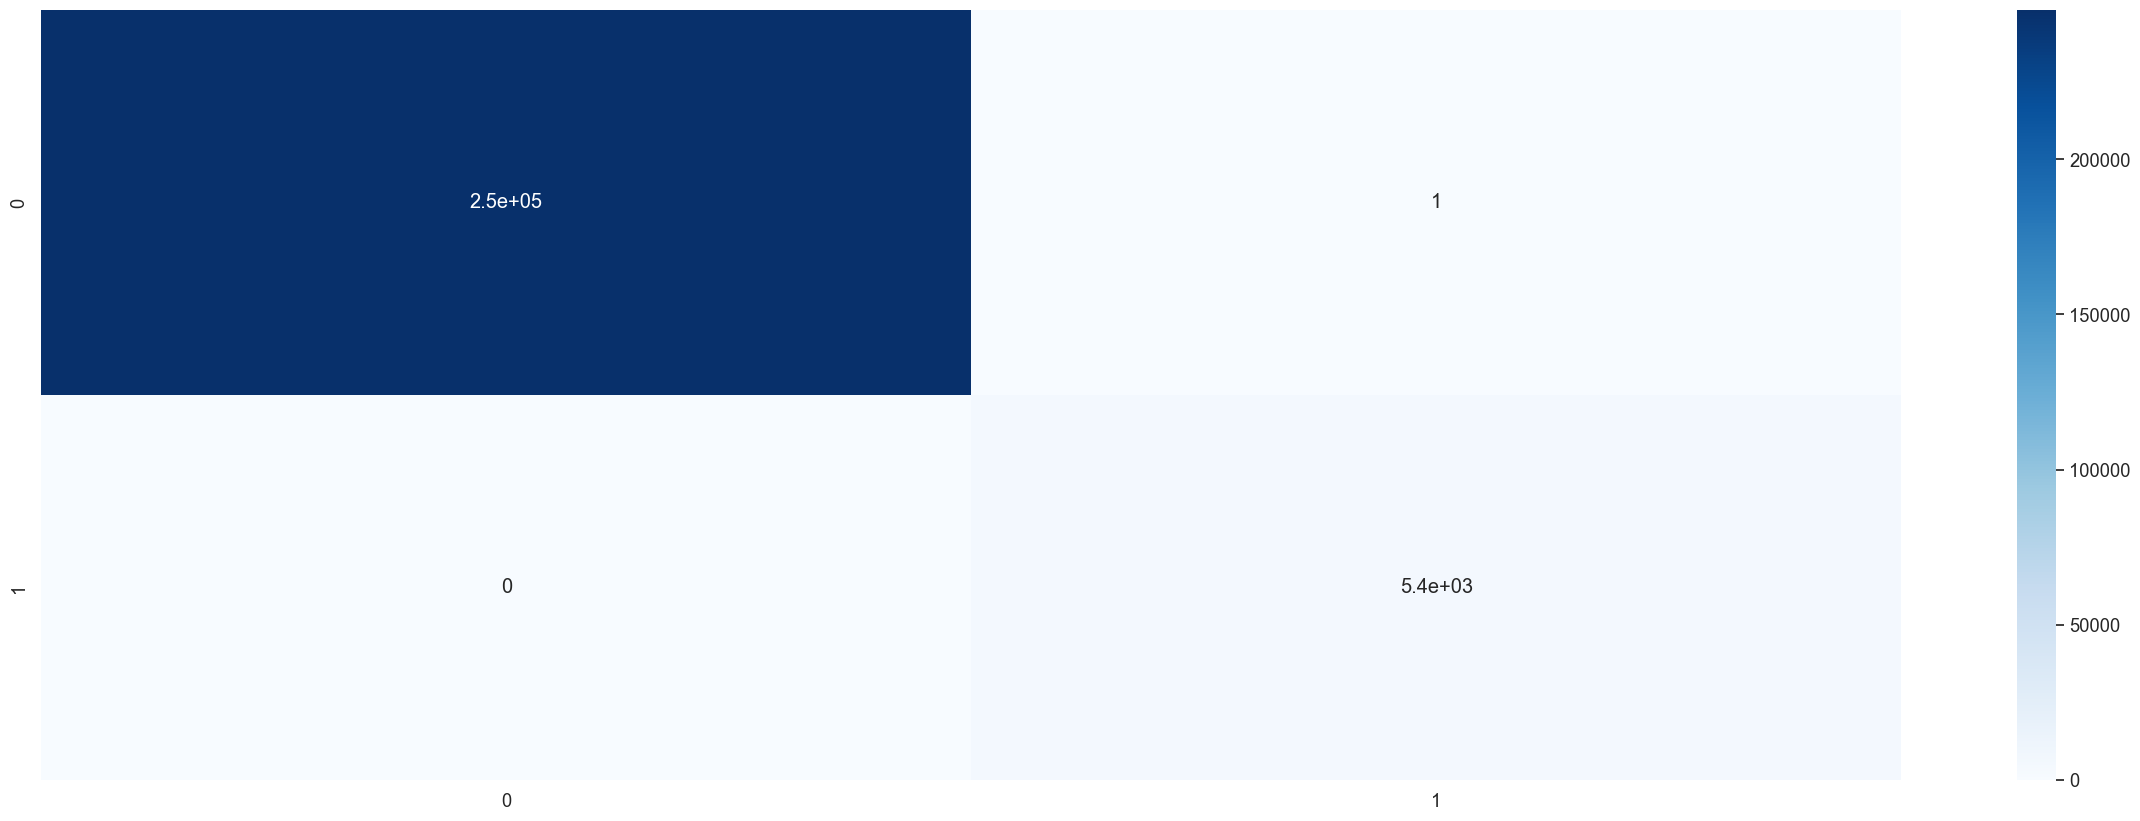

In [48]:
graph_confusion_matrix(clf_rf_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=True)

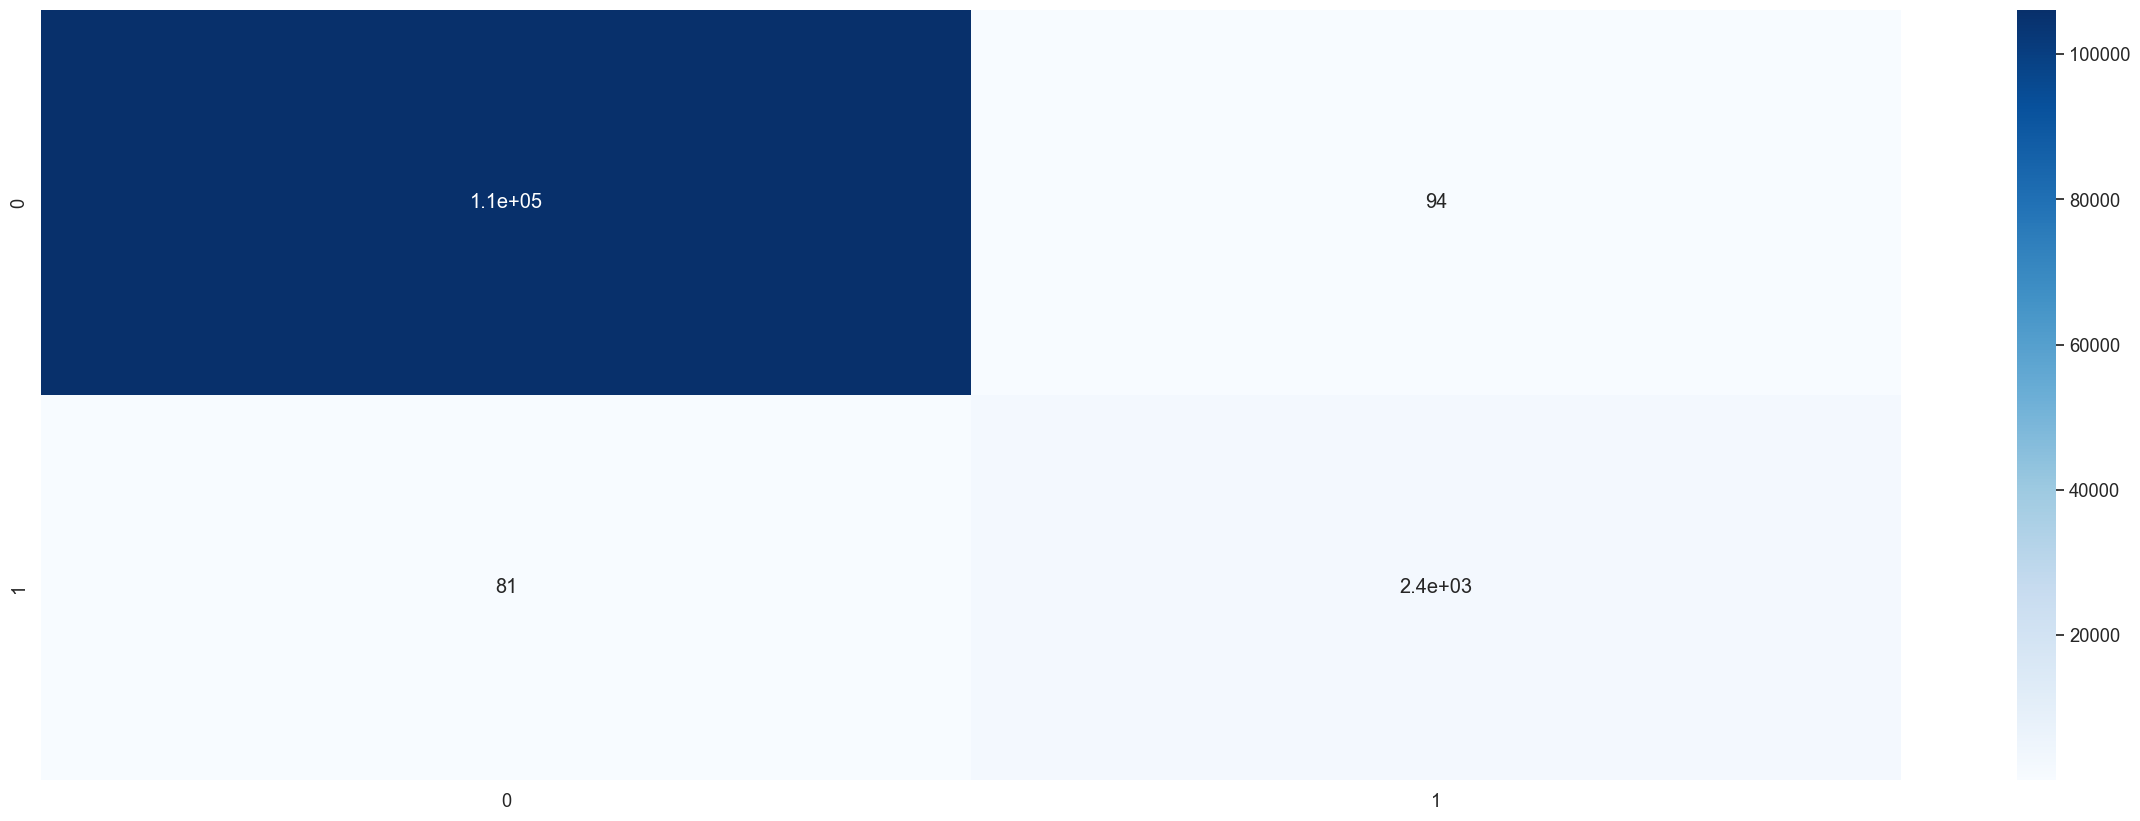

In [49]:
graph_confusion_matrix(clf_rf_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=False)

<b>Peso de las características</b>

In [50]:
# estudio del peso de las características
valor_caracteristicas = clf_rf_comments.feature_importances_

# unimos las características con su peso
features = X_comments_train.columns
valor_caracteristicas_df = pd.DataFrame({'característica': features, 'peso': valor_caracteristicas}, )
valor_caracteristicas_df = valor_caracteristicas_df.set_index('característica')

# ordenamos por peso
valor_caracteristicas_df = valor_caracteristicas_df.sort_values(by='peso', ascending=False)

valor_caracteristicas_df

,peso
característica,
comment_count_encoded,0.799699
ratio_viralidad,0.061281
ratio_interaccion_dia_encoded,0.045724
likes_encoded,0.022610
dislikes_encoded,0.015916
ratings_disabled,0.014854
channel_title_encoded,0.010185
category_encoded,0.007735
views_encoded,0.007274


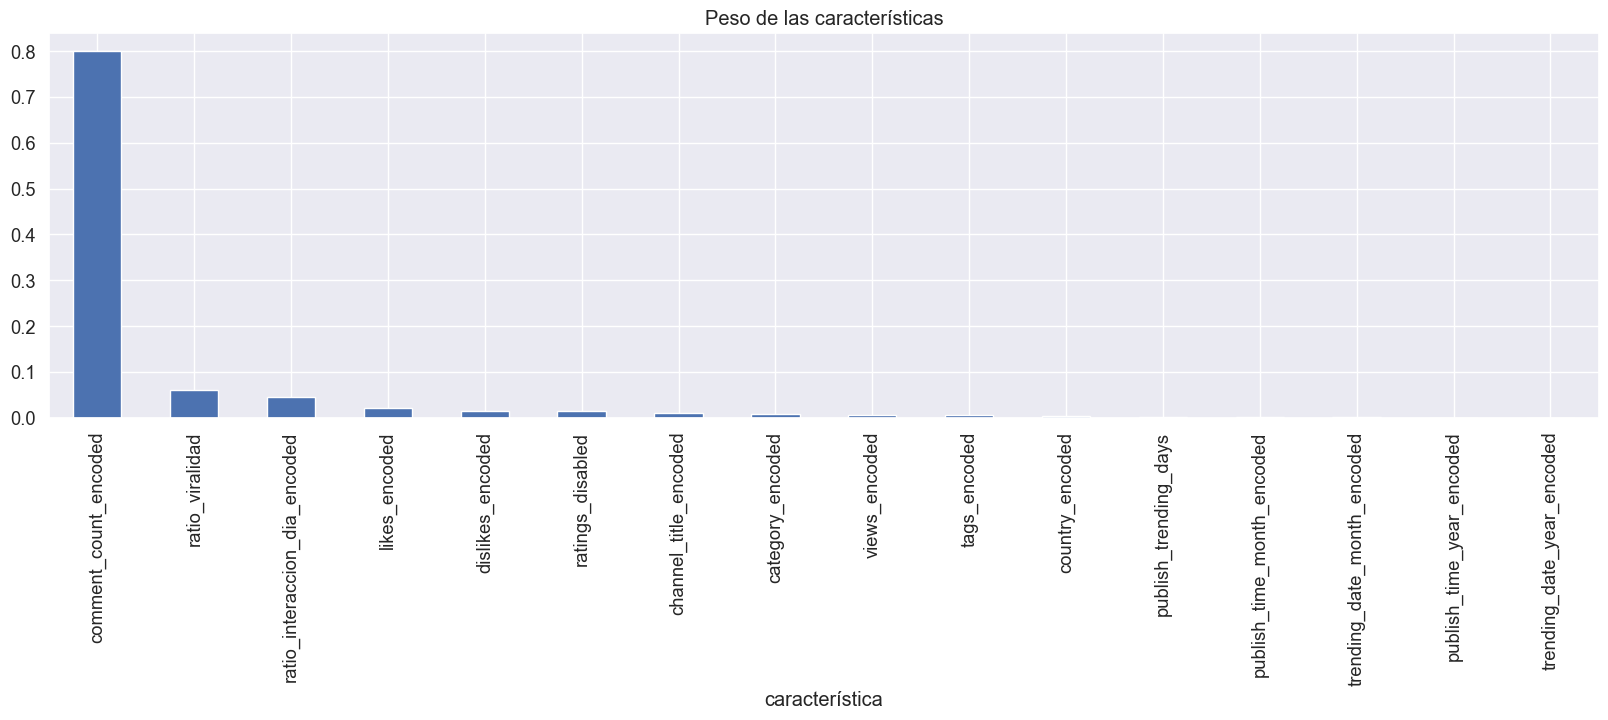

In [51]:
# graficamos
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

valor_caracteristicas_df['peso'].plot.bar()
plt.title('Peso de las características')
plt.show()

Una sola variable, comment_count_encoded, tiene casi el 80% del peso de todas las variables. Lo que es razonable, ya que es el contador de comentarios de las publicaciones y la variable objetivo es tener o no activados los comentarios.

<b>Random Forest sin las características de menor peso</b><br>
Vamos a repetir Random Forest sin contar con las variables que acabamos de ver que menos información aportan.

- Dejar la característica de mayor peso<br>
Vamos a dejar sólo comment_count.

In [52]:
X_comments_train_reduced_1 = X_comments_train[['comment_count_encoded']].copy()

X_comments_train_reduced_1

,comment_count_encoded
237478,-0.166139
85145,0.180423
229682,-0.126593
160791,-0.133741
229452,-0.166139
...,...
119995,0.077573
272332,-0.163115
132306,0.918707
147551,0.248910


In [53]:
X_comments_test_reduced_1 = X_comments_test[['comment_count_encoded']].copy()

X_comments_test_reduced_1

,comment_count_encoded
100514,0.189141
207709,-0.166296
350142,0.293286
58493,-0.084103
121579,-0.086970
...,...
152272,0.035868
186090,0.010657
133979,-0.101892
80401,-0.162015


In [54]:
clf_rf_reduced_1 = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

Usamos los mejores parámetros resultantes de Cross Validation

In [55]:
print('Iterando...')

clf_rf_reduced_1 = RandomForestClassifier(**best_params_rf_gscv_comments)
clf_rf_reduced_1.fit(X_comments_train_reduced_1, np.ravel(y_comments_train))

Iterando...


RandomForestClassifier(class_weight={False: 0.5108907619907168,
                                     True: 23.455234924158344},
                       criterion='entropy', n_estimators=200)

In [56]:
print_score(clf_rf_reduced_1, X_comments_train_reduced_1, y_comments_train, X_comments_test_reduced_1, y_comments_test, train=True)

Train Result:
Accuracy Score: 99.39%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       1.000000     0.777394  0.993896       0.888697       0.995255
recall          0.993763     1.000000  0.993896       0.996881       0.993896
f1-score        0.996872     0.874757  0.993896       0.935814       0.994269
support    248192.000000  5406.000000  0.993896  253598.000000  253598.000000


In [57]:
print_score(clf_rf_reduced_1, X_comments_train_reduced_1, y_comments_train, X_comments_test_reduced_1, y_comments_test, train=False)

Test Result:
Accuracy Score: 99.42%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       1.000000     0.796709  0.994203       0.898354       0.995382
recall          0.994069     1.000000  0.994203       0.997034       0.994203
f1-score        0.997026     0.886853  0.994203       0.941939       0.994523
support    106216.000000  2469.000000  0.994203  108685.000000  108685.000000


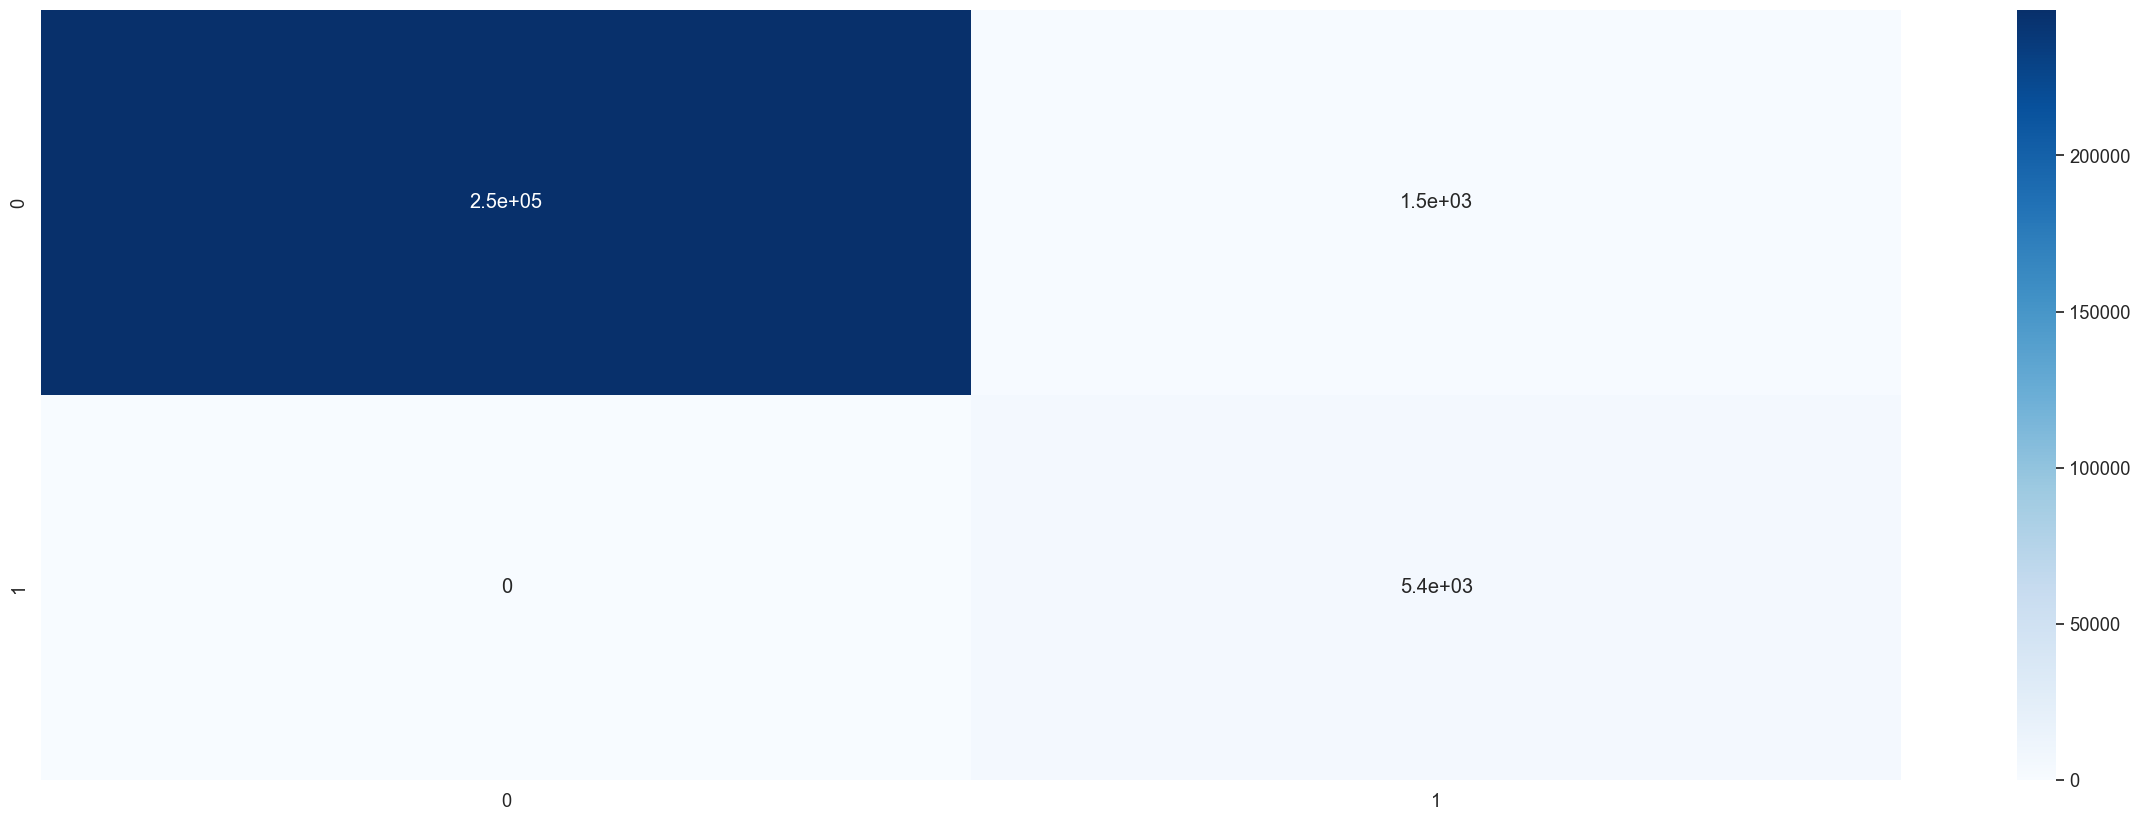

In [58]:
graph_confusion_matrix(clf_rf_reduced_1, X_comments_train_reduced_1, y_comments_train, X_comments_test_reduced_1, y_comments_test, train=True)

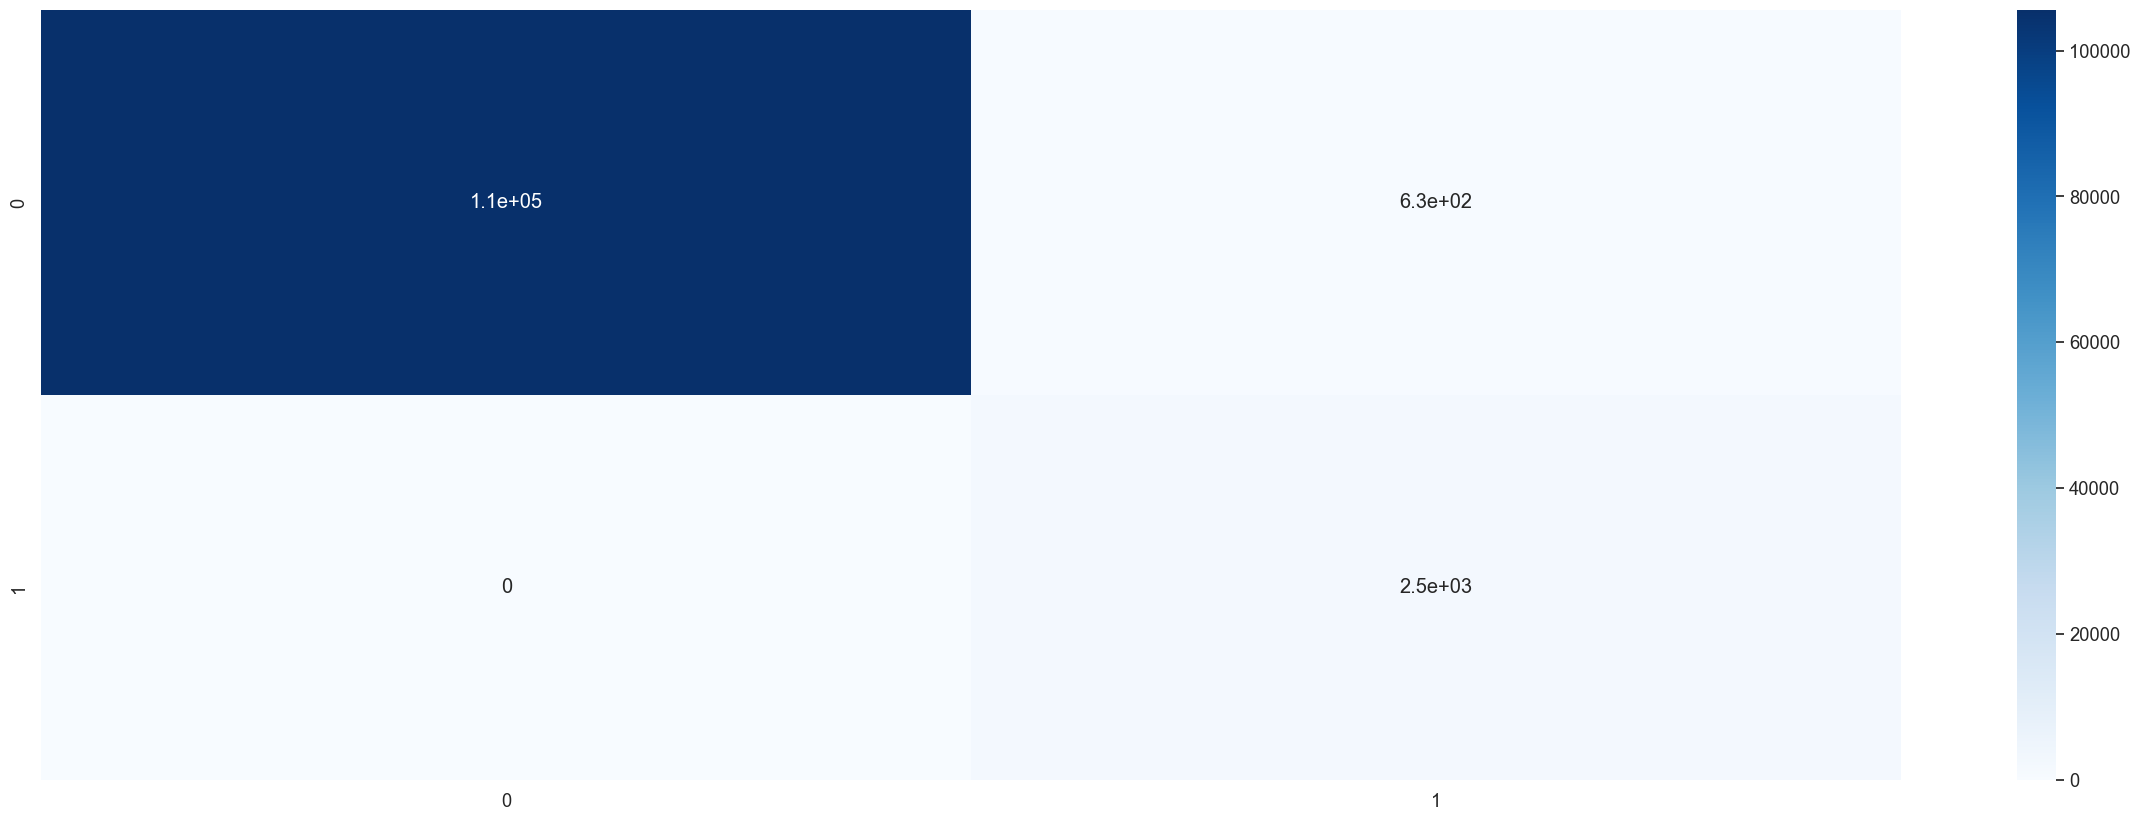

In [59]:
graph_confusion_matrix(clf_rf_reduced_1, X_comments_train_reduced_1, y_comments_train, X_comments_test_reduced_1, y_comments_test, train=False)

- Dejar las 4 características de mayor peso:<br>
comment_count_encoded, ratio_viralidad, ratio_interaccion_dia_encoded, likes_encoded

In [60]:
X_comments_train_reduced_2 = X_comments_train[['comment_count_encoded', 'ratio_viralidad', 'ratio_interaccion_dia_encoded', 'likes_encoded']].copy()

X_comments_train_reduced_2

,comment_count_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,likes_encoded
237478,-0.166139,0.081763,-0.218585,-0.224490
85145,0.180423,0.063240,0.168444,0.187303
229682,-0.126593,0.062282,-0.199790,-0.210346
160791,-0.133741,0.038524,-0.074028,-0.064641
229452,-0.166139,0.008240,-0.223266,-0.230170
...,...,...,...,...
119995,0.077573,0.069026,0.581869,0.651878
272332,-0.163115,0.098446,-0.221135,-0.228139
132306,0.918707,0.026509,1.698879,1.873138
147551,0.248910,0.099088,0.736745,0.858205


In [61]:
X_comments_test_reduced_2 = X_comments_test[['comment_count_encoded', 'ratio_viralidad', 'ratio_interaccion_dia_encoded', 'likes_encoded']].copy()

X_comments_test_reduced_2

,comment_count_encoded,ratio_viralidad,ratio_interaccion_dia_encoded,likes_encoded
100514,0.189141,0.045063,0.228902,0.238041
207709,-0.166296,0.045833,-0.212172,-0.217121
350142,0.293286,0.180750,0.923671,1.097585
58493,-0.084103,0.027612,0.004559,0.024448
121579,-0.086970,0.009216,-0.161749,-0.187565
...,...,...,...,...
152272,0.035868,0.007172,0.110013,0.123322
186090,0.010657,0.031984,0.155360,0.173039
133979,-0.101892,0.063758,-0.178779,-0.184487
80401,-0.162015,0.011862,-0.207150,-0.212853


In [62]:
clf_rf_reduced_2 = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

In [63]:
print('Iterando...')

clf_rf_reduced_2 = RandomForestClassifier(**best_params_rf_gscv_comments)
clf_rf_reduced_2.fit(X_comments_train_reduced_2, np.ravel(y_comments_train))

Iterando...


RandomForestClassifier(class_weight={False: 0.5108907619907168,
                                     True: 23.455234924158344},
                       criterion='entropy', n_estimators=200)

In [64]:
print_score(clf_rf_reduced_2, X_comments_train_reduced_2, y_comments_train, X_comments_test_reduced_2, y_comments_test, train=True)

Train Result:
Accuracy Score: 99.97%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       1.000000     0.985957  0.999696       0.992978       0.999701
recall          0.999690     1.000000  0.999696       0.999845       0.999696
f1-score        0.999845     0.992929  0.999696       0.996387       0.999697
support    248192.000000  5406.000000  0.999696  253598.000000  253598.000000


In [65]:
print_score(clf_rf_reduced_2, X_comments_train_reduced_2, y_comments_train, X_comments_test_reduced_2, y_comments_test, train=False)

Test Result:
Accuracy Score: 99.72%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       0.998794     0.930815  0.997221       0.964805       0.997250
recall          0.998362     0.948157  0.997221       0.973259       0.997221
f1-score        0.998578     0.939406  0.997221       0.968992       0.997234
support    106216.000000  2469.000000  0.997221  108685.000000  108685.000000


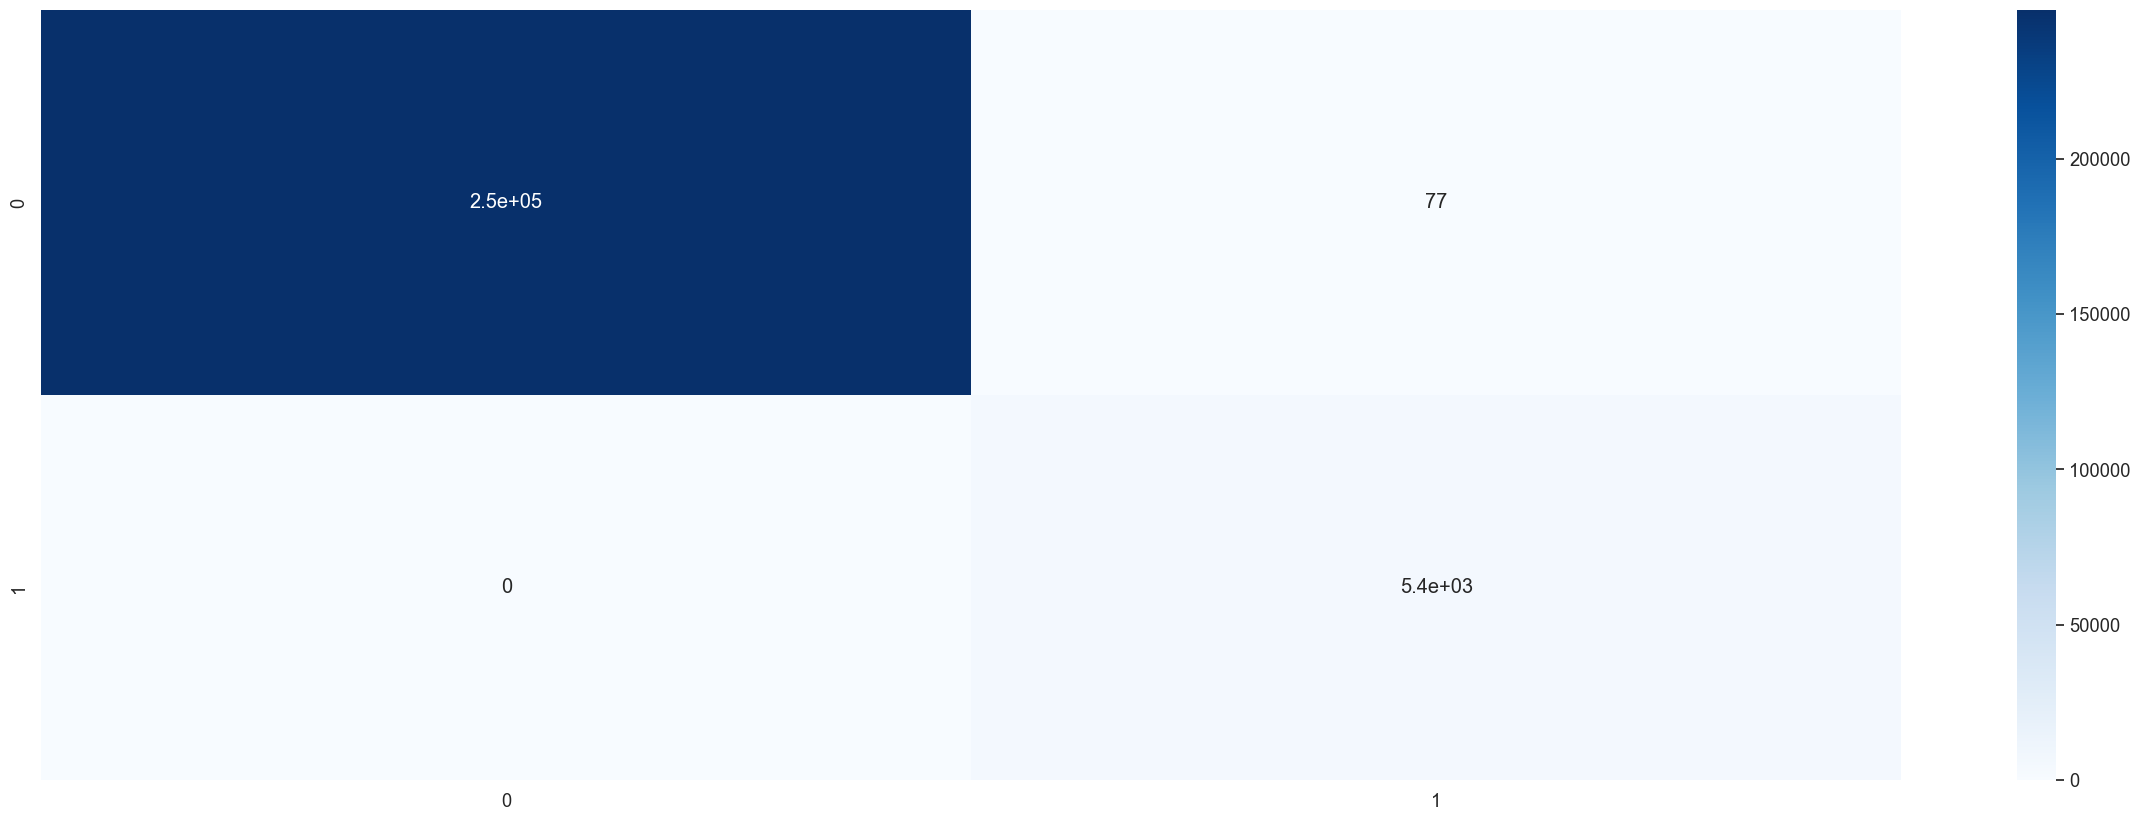

In [66]:
graph_confusion_matrix(clf_rf_reduced_2, X_comments_train_reduced_2, y_comments_train, X_comments_test_reduced_2, y_comments_test, train=True)

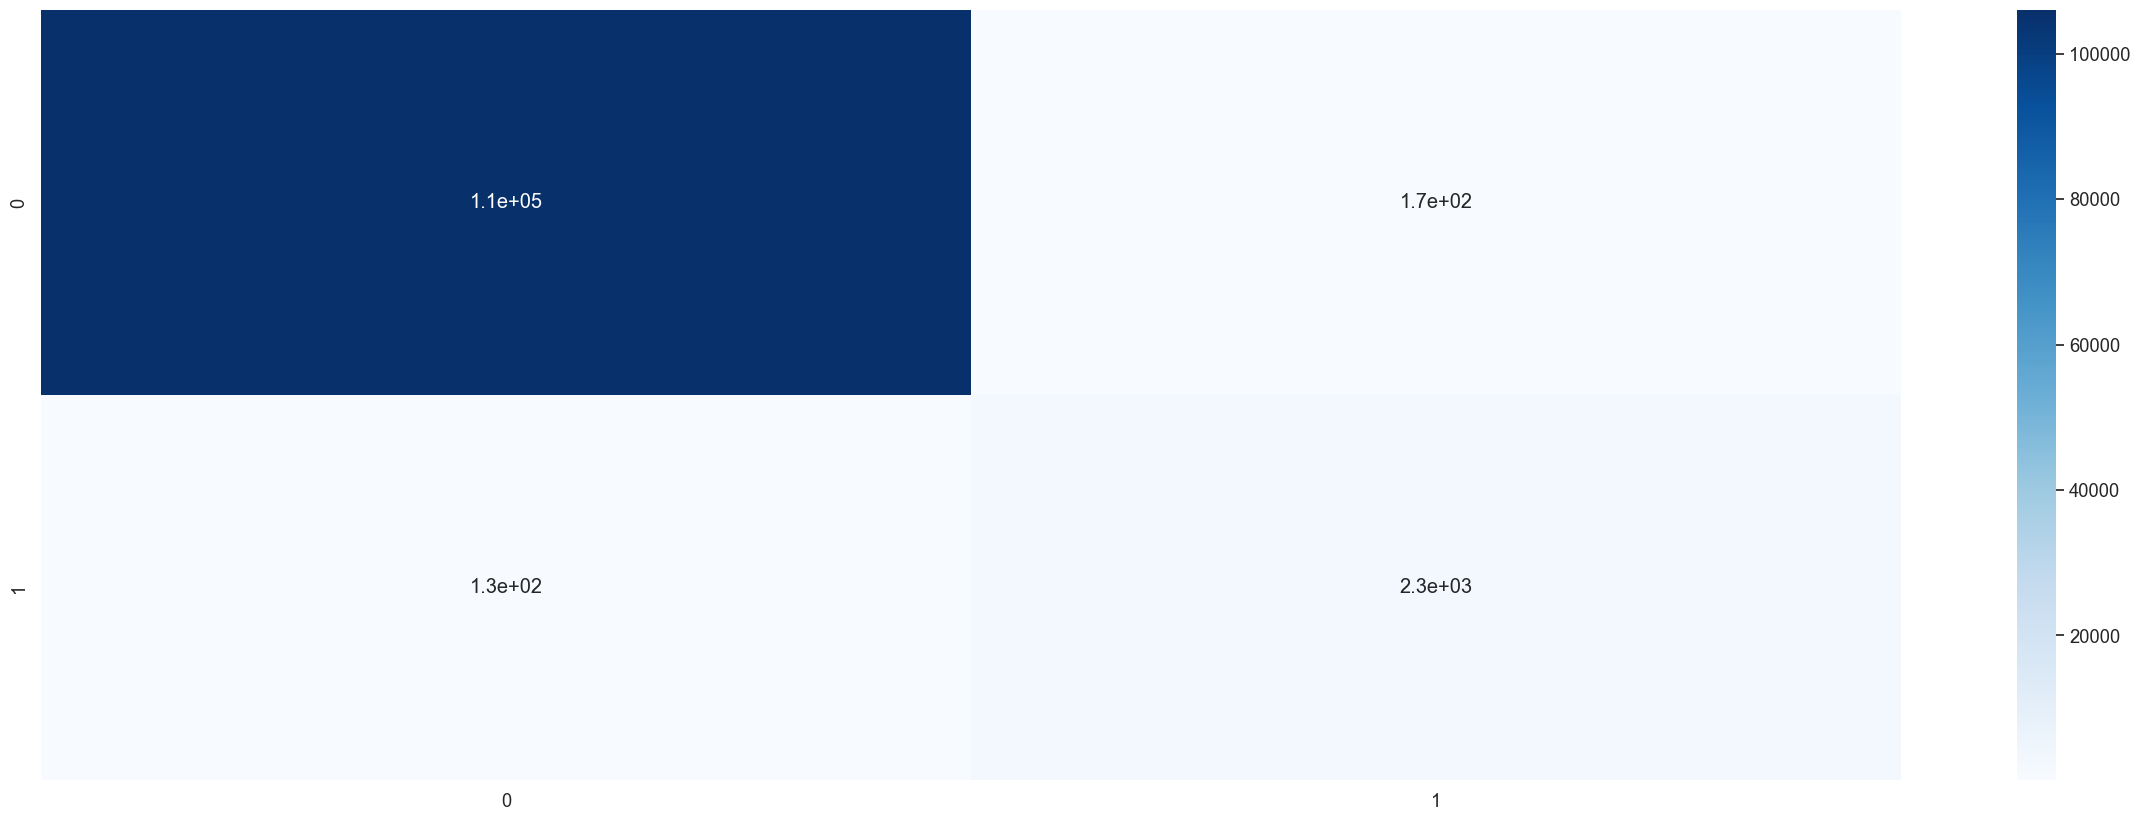

In [67]:
graph_confusion_matrix(clf_rf_reduced_2, X_comments_train_reduced_2, y_comments_train, X_comments_test_reduced_2, y_comments_test, train=False)

### Resultados de Random Forest

Con todas las características tenemos un 100% de accuracy en entrenamiento, y un 99.80% en pruebas. Al reducir características, estos valores bajan ligeramente, aunque siempre por encima del 99%.<br>
Random Forest ofrece muy buenos resultados para identificar 'comments_disabled'.

## - ratings_disabled

In [68]:
clf_rf_ratings = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

### Cross Validation

<b>Randomized Search</b>

In [69]:
n_estimators_rs_rf_ratings = [300, 500]   # 100: núm. árboles en el bosque
criterion_rs_rf_ratings = ['gini', 'entropy']
max_depth_rs_rf_ratings = [None]   # None: profundidad máxima; 'None': no limitado
min_samples_split_rs_rf_ratings = [5, 10]   # 2: núm. mínimo de muestras para dividir un nodo; int [2, inf), float (0.0, 1.0]
min_samples_leaf_rs_rf_ratings = [2, 3]   # 1: núm. mínimo de muestras en una hoja
max_features_rs_rf_ratings = [None, 'sqrt', 'log2']   # 'sqrt': núm. máximo de características a considerar al buscar la mejor difusión; valor numérico (int, float), 'sqrt', 'log2', None (max_features=n_features)
max_leaf_nodes_rs_rf_ratings = [None]   # None: núm. máximo de nodos hoja; 'None': sin limitación; rango [2, inf)
min_impurity_decrease_rs_rf_ratings = [0.0]   # 0.0: gini, nodo se divide si la reducción en la impureza es mayor que este valor; el algoritmo no dividirá nodos que no mejoren significativamente la pureza de las hojas
bootstrap_rs_rf_ratings = [True, False]   # True; False, se usa todo el conjunto de datos para construir cada árbol; True: se usan muestras de bootstrap
ccp_alpha_rs_rf_ratings = [0.0, 0.1]   # poda; cuanto mayor sea, más se poda
class_weight_rs_rf_ratings = [class_weight_ratings]   # pesos de las clases, {class_label: weight}

random_grid_rs_rf_ratings = {'n_estimators': n_estimators_rs_rf_ratings, 'criterion': criterion_rs_rf_ratings, 'max_depth': max_depth_rs_rf_ratings, \
                              'min_samples_split': min_samples_split_rs_rf_ratings, 'min_samples_leaf': min_samples_leaf_rs_rf_ratings, 'max_features': max_features_rs_rf_ratings, \
                              'max_leaf_nodes': max_leaf_nodes_rs_rf_ratings, 'min_impurity_decrease': min_impurity_decrease_rs_rf_ratings, \
                              'bootstrap': bootstrap_rs_rf_ratings, 'ccp_alpha': ccp_alpha_rs_rf_ratings, 'class_weight': class_weight_rs_rf_ratings}

In [70]:
print('Iterando...')

rf_rscv_ratings = RandomizedSearchCV(estimator=clf_rf_ratings, param_distributions=random_grid_rs_rf_ratings, scoring=None, n_iter=40, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')

rf_rscv_ratings.fit(X_ratings_train, np.ravel(y_ratings_train))

best_params_rf_rscv_ratings = rf_rscv_ratings.best_params_
print(f"Best paramters: {best_params_rf_rscv_ratings})")

Iterando...
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   24.5s


Best paramters: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'criterion': 'entropy', 'class_weight': {False: 0.5095296457776617, True: 26.73392367699768}, 'ccp_alpha': 0.0, 'bootstrap': True})


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   39.2s finished


<b>Grid Search</b>

In [71]:
n_estimators_gs_rf_ratings = list(range(250, 351, 50))
criterion_gs_rf_ratings = ['entropy']
max_depth_gs_rf_ratings = [None]
min_samples_split_gs_rf_ratings = list(range(4, 7))
min_samples_leaf_gs_rf_ratings = list(range(1, 4))
max_features_gs_rf_ratings = [None]
max_leaf_nodes_gs_rf_ratings = [None]   # [2, inf)
min_impurity_decrease_gs_rf_ratings = [0.0]
ccp_alpha_gs_rf_ratings = [0.0]
bootstrap_gs_rf_ratings = [True]
class_weight_gs_rf_ratings = [class_weight_ratings]   # pesos de las clases, {class_label: weight}

random_grid_gs_rf_ratings = {'n_estimators': n_estimators_gs_rf_ratings, 'criterion': criterion_gs_rf_ratings, 'max_depth': max_depth_gs_rf_ratings, \
                              'min_samples_split': min_samples_split_gs_rf_ratings, 'min_samples_leaf': min_samples_leaf_gs_rf_ratings, 'max_features': max_features_gs_rf_ratings, \
                              'max_leaf_nodes': max_leaf_nodes_gs_rf_ratings, 'min_impurity_decrease': min_impurity_decrease_gs_rf_ratings, 'bootstrap': bootstrap_gs_rf_ratings, \
                              'ccp_alpha': ccp_alpha_gs_rf_ratings, 'class_weight': class_weight_gs_rf_ratings}

In [72]:
print('Iterando...')

rf_gscv_ratings = GridSearchCV(estimator=clf_rf_ratings, param_grid=random_grid_gs_rf_ratings, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')
rf_gscv_ratings.fit(X_ratings_train, np.ravel(y_ratings_train))

best_params_rf_gscv_ratings = rf_gscv_ratings.best_params_
print(f"Best parameters: {best_params_rf_gscv_ratings}")

Iterando...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.3s


Best parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {False: 0.5095296457776617, True: 26.73392367699768}, 'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 250}


[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   32.5s finished


### Random Forest

In [73]:
print('Iterando...')

clf_rf_ratings = RandomForestClassifier(**best_params_rf_gscv_ratings)
clf_rf_ratings.fit(X_ratings_train, np.ravel(y_ratings_train))

Iterando...


RandomForestClassifier(class_weight={False: 0.5095296457776617,
                                     True: 26.73392367699768},
                       criterion='entropy', max_features=None,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=250)

In [74]:
print_score(clf_rf_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=True)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       1.000000     0.998526  0.999972       0.999263       0.999972
recall          0.999972     1.000000  0.999972       0.999986       0.999972
f1-score        0.999986     0.999263  0.999972       0.999624       0.999972
support    248855.000000  4743.000000  0.999972  253598.000000  253598.000000


In [75]:
print_score(clf_rf_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=False)

Test Result:
Accuracy Score: 99.99%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       0.999991     0.996526  0.999926       0.998258       0.999927
recall          0.999934     0.999502  0.999926       0.999718       0.999926
f1-score        0.999963     0.998012  0.999926       0.998987       0.999926
support    106676.000000  2009.000000  0.999926  108685.000000  108685.000000


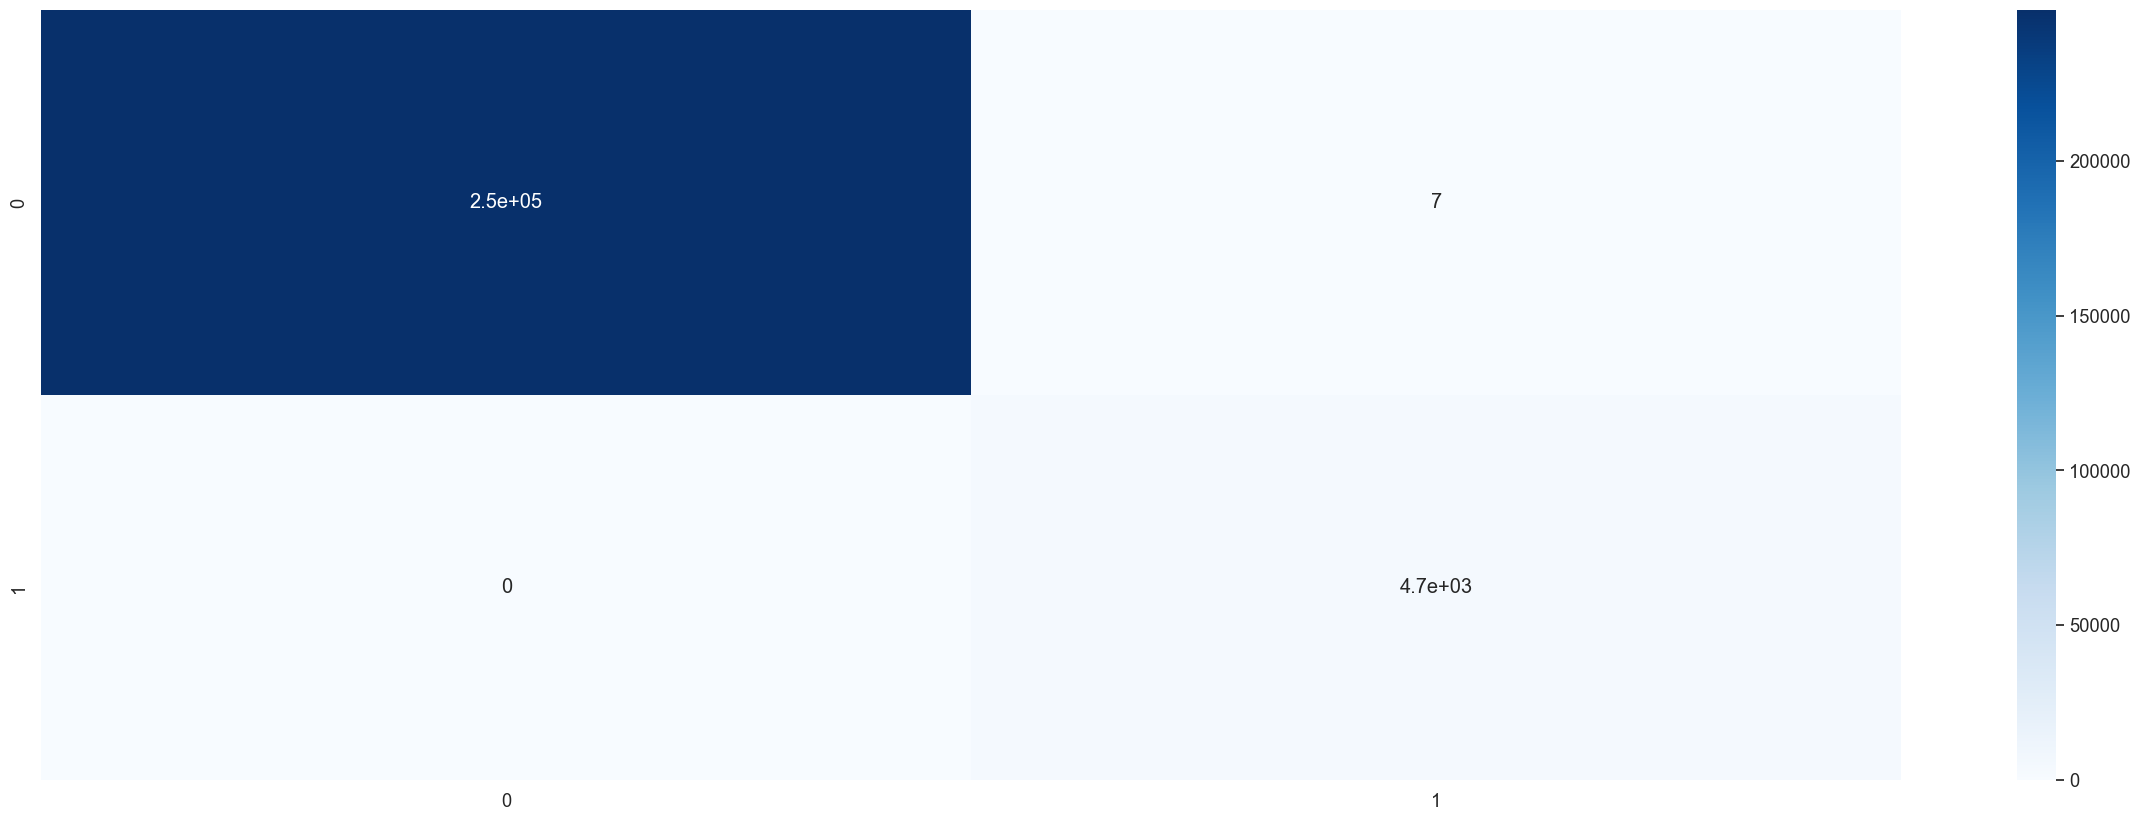

In [76]:
graph_confusion_matrix(clf_rf_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=True)

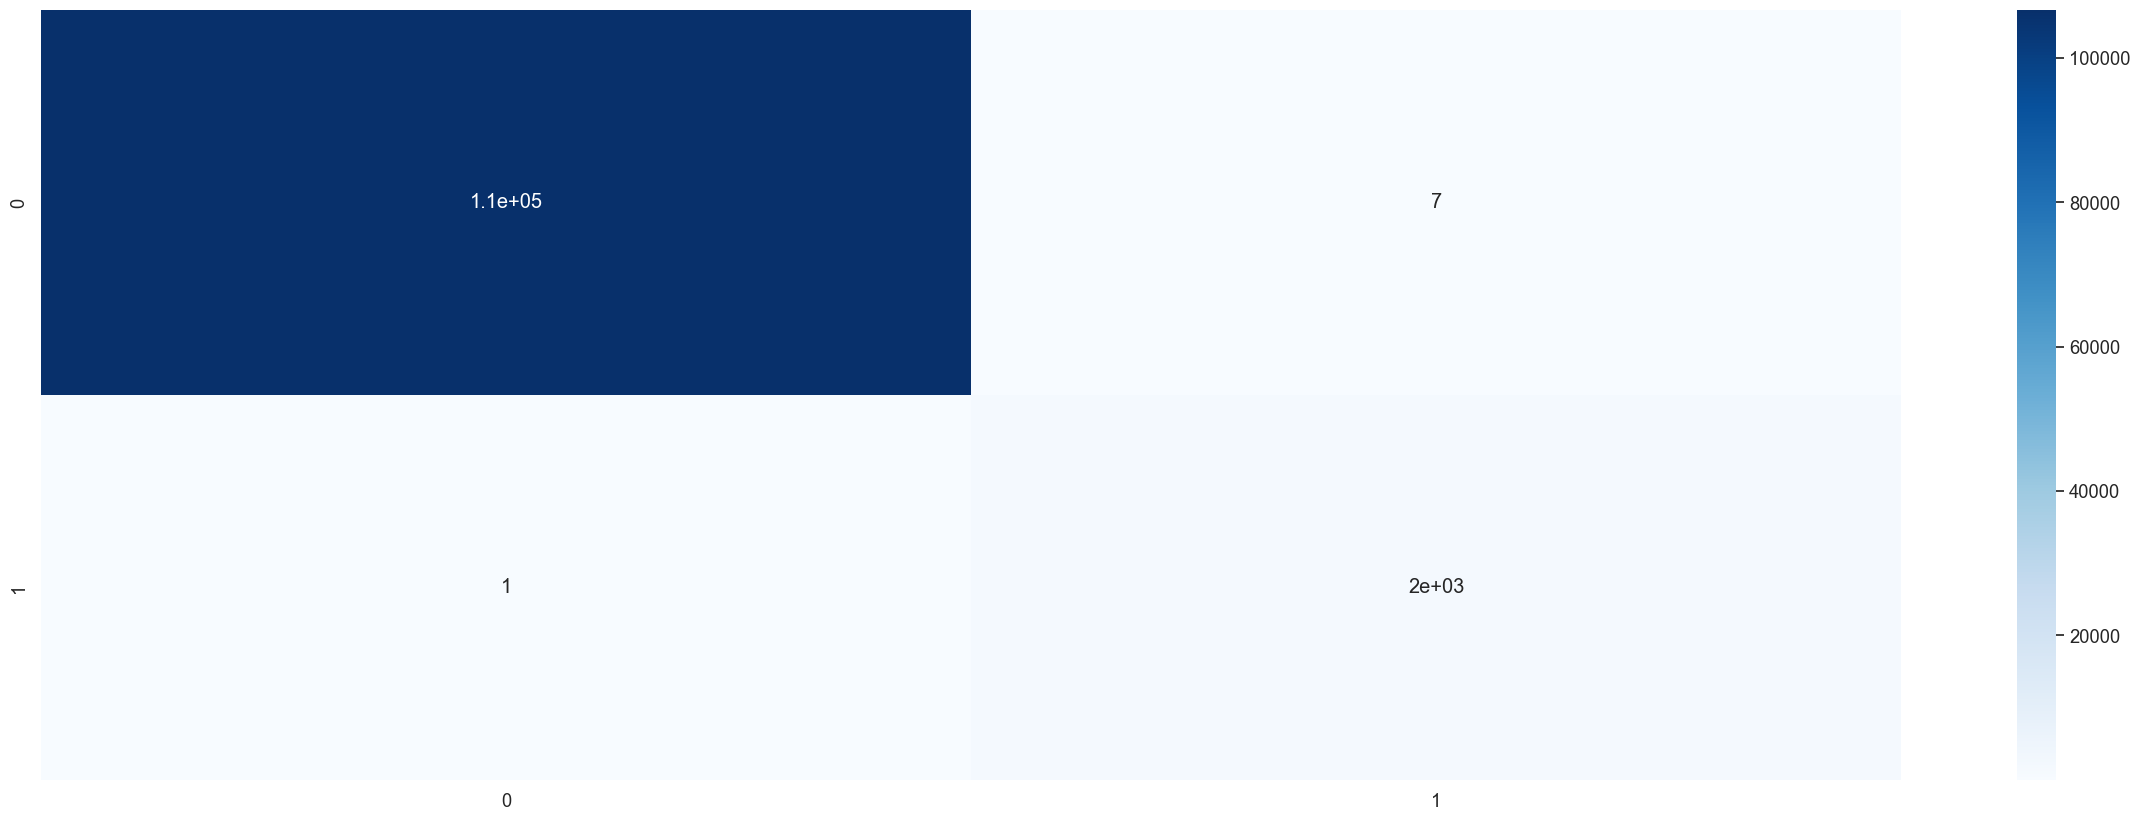

In [77]:
graph_confusion_matrix(clf_rf_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=False)

<b>Peso de las características</b>

In [78]:
# estudio del peso de las características
valor_caracteristicas = clf_rf_ratings.feature_importances_

# unimos las características con su peso
features = X_ratings_train.columns
valor_caracteristicas_df = pd.DataFrame({'característica': features, 'peso': valor_caracteristicas}, )
valor_caracteristicas_df = valor_caracteristicas_df.set_index('característica')

# ordenamos por peso
valor_caracteristicas_df = valor_caracteristicas_df.sort_values(by='peso', ascending=False)

valor_caracteristicas_df

,peso
característica,
likes_encoded,0.998786
dislikes_encoded,0.000331
views_encoded,0.000216
publish_trending_days,0.000157
comments_disabled,0.000137
category_encoded,0.000074
publish_time_month_encoded,0.000049
country_encoded,0.000044
trending_date_month_encoded,0.000038


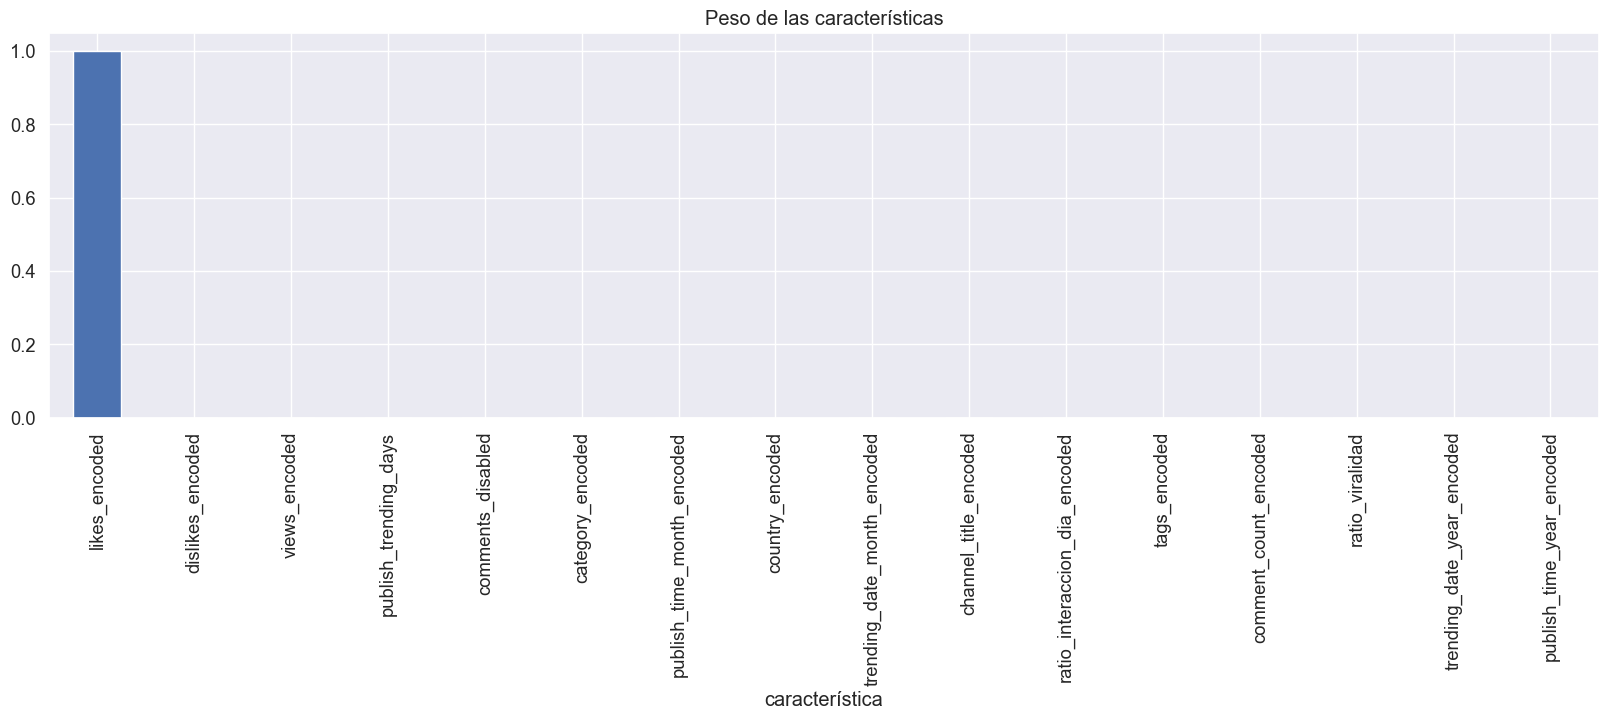

In [79]:
# graficamos
sns.set(font_scale=1.2)
plt.figure(figsize=(20, 5))

valor_caracteristicas_df['peso'].plot.bar()
plt.title('Peso de las características')
plt.show()

Una única característica, likes_encoded, proporciona el 99% de la información para ratings_disabled.

<b>Random Forest sin las características de menor peso</b><br>
En este caso, sólo vamos a probar a mantener la característica de mayor peso, likes_encoded, ya que todas las demás son muy minoritarias en comparación con ella.

In [80]:
X_ratings_train_reduced_1 = X_ratings_train[['likes_encoded']]

X_ratings_train_reduced_1.columns

Index(['likes_encoded'], dtype='object')

In [81]:
X_ratings_test_reduced_1 = X_ratings_test[['likes_encoded']]

X_ratings_test_reduced_1.columns

Index(['likes_encoded'], dtype='object')

In [82]:
clf_rf_reduced_ratings_1 = RandomForestClassifier(random_state=42, n_jobs=-1, verbose=1)

In [83]:
print('Iterando...')

clf_rf_reduced_ratings_1 = RandomForestClassifier(**best_params_rf_gscv_ratings)
clf_rf_reduced_ratings_1.fit(X_ratings_train_reduced_1, np.ravel(y_ratings_train))

Iterando...


RandomForestClassifier(class_weight={False: 0.5095296457776617,
                                     True: 26.73392367699768},
                       criterion='entropy', max_features=None,
                       min_samples_leaf=2, min_samples_split=4,
                       n_estimators=250)

In [84]:
print_score(clf_rf_reduced_ratings_1, X_ratings_train_reduced_1, y_ratings_train, X_ratings_test_reduced_1, y_ratings_test, train=True)

Train Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       1.000000     0.990188  0.999815       0.995094       0.999816
recall          0.999811     1.000000  0.999815       0.999906       0.999815
f1-score        0.999906     0.995070  0.999815       0.997488       0.999815
support    248855.000000  4743.000000  0.999815  253598.000000  253598.000000


In [85]:
print_score(clf_rf_reduced_ratings_1, X_ratings_train_reduced_1, y_ratings_train, X_ratings_test_reduced_1, y_ratings_test, train=False)

Test Result:
Accuracy Score: 99.98%
_______________________________________________
CLASSIFICATION REPORT:
                   False        True  accuracy      macro avg   weighted avg
precision       1.000000     0.99112  0.999834       0.995560       0.999836
recall          0.999831     1.00000  0.999834       0.999916       0.999834
f1-score        0.999916     0.99554  0.999834       0.997728       0.999835
support    106676.000000  2009.00000  0.999834  108685.000000  108685.000000


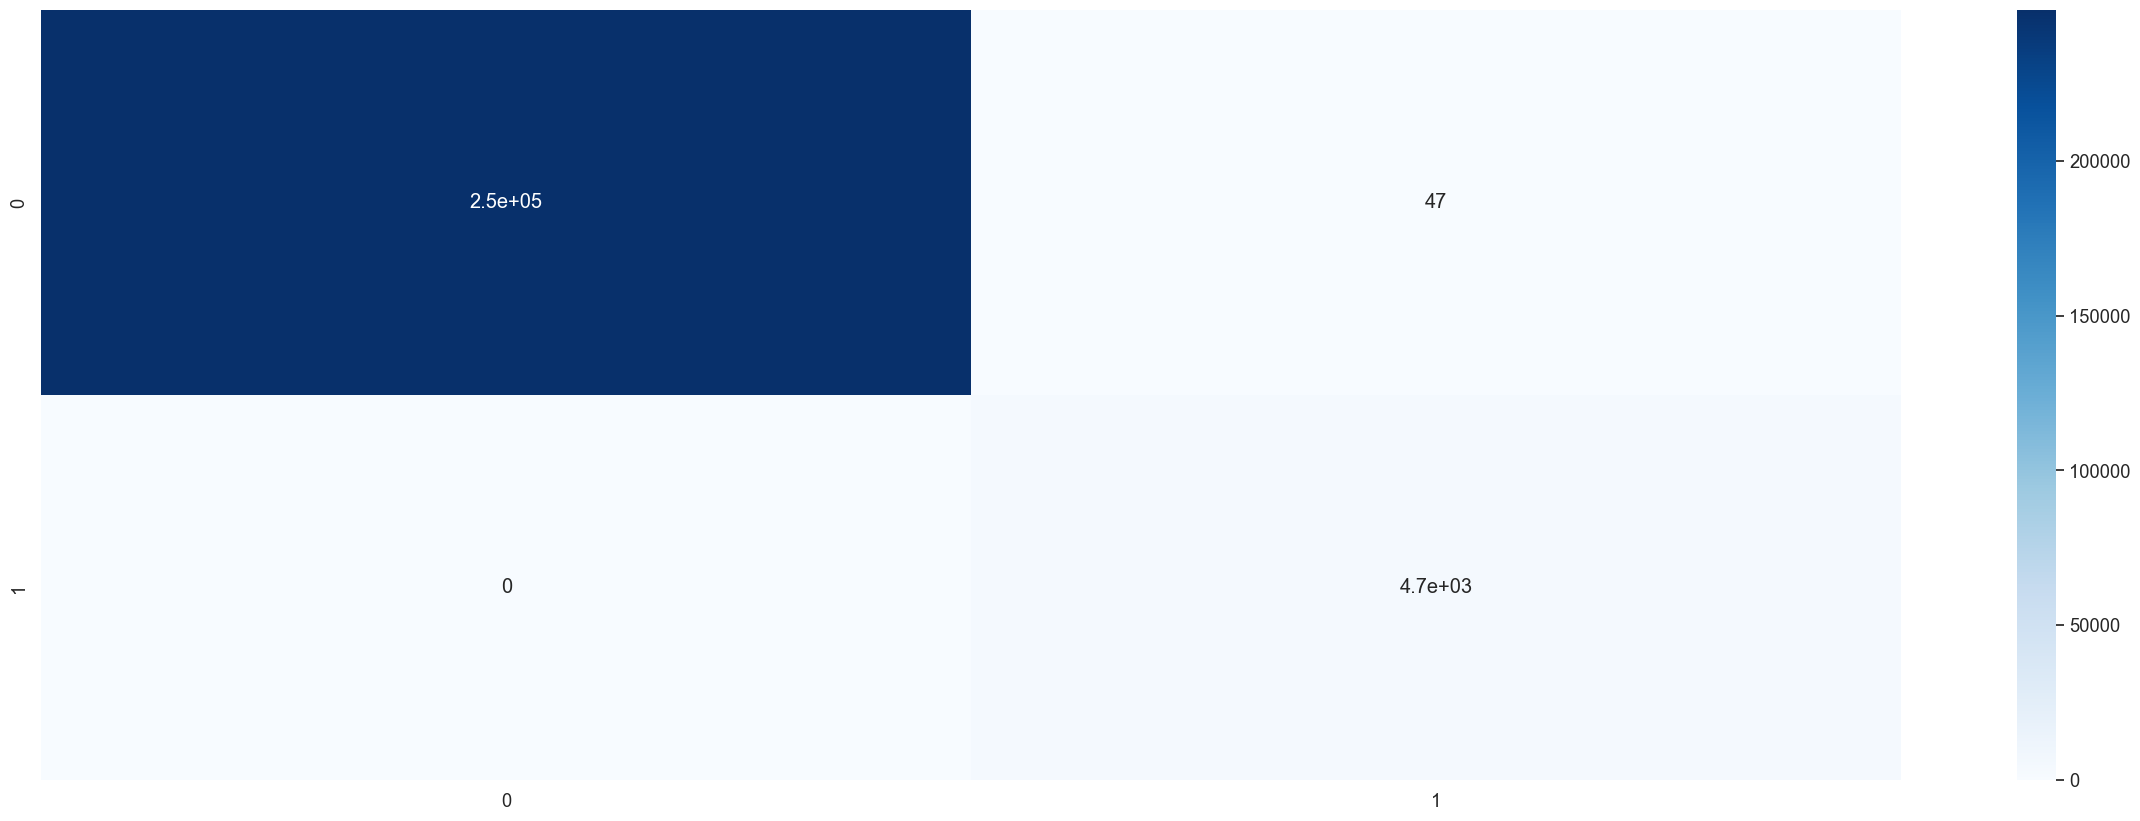

In [86]:
graph_confusion_matrix(clf_rf_reduced_ratings_1, X_ratings_train_reduced_1, y_ratings_train, X_ratings_test_reduced_1, y_ratings_test, train=True)

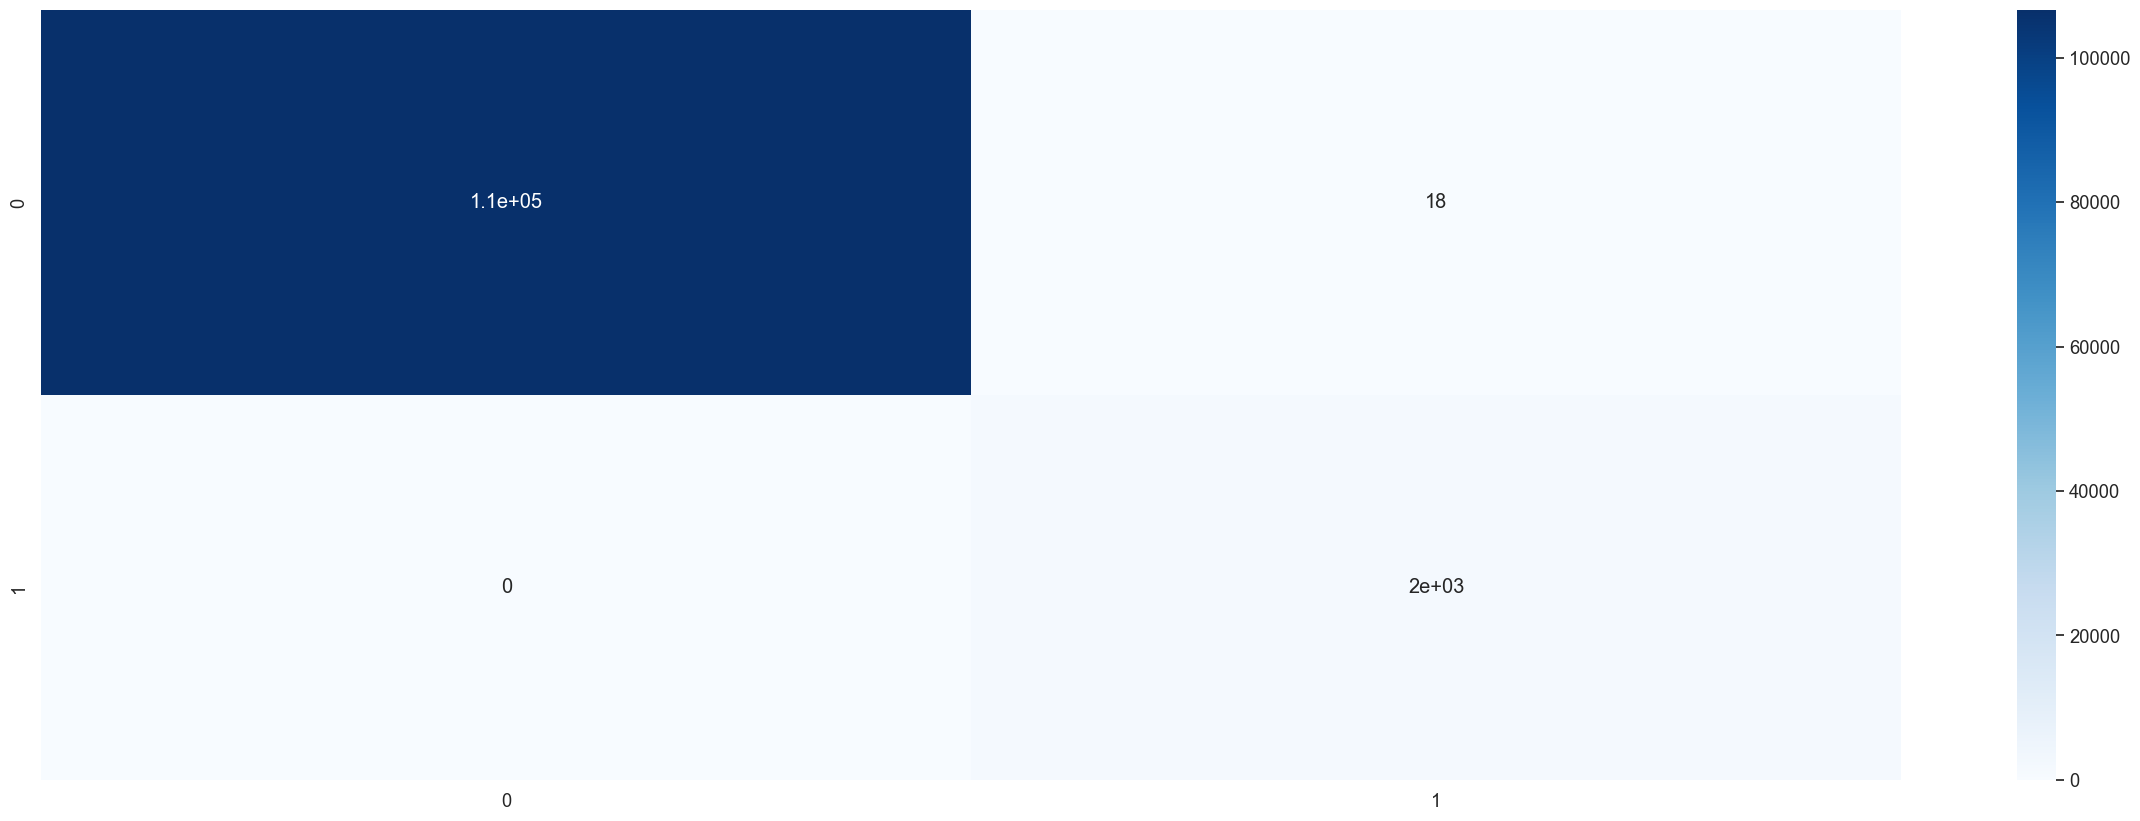

In [87]:
graph_confusion_matrix(clf_rf_reduced_ratings_1, X_ratings_train_reduced_1, y_ratings_train, X_ratings_test_reduced_1, y_ratings_test, train=False)

### Resultados de Random Forest

Obtenemos resultados muy buenos con Random Forest para precedir la variable ratings_disabled, el 99.99%, bajando sólo al 99.98% con una única característica, likes_encoded.

# MLP (Perceptrones Multicapa)

In [88]:
from sklearn.neural_network import MLPClassifier

## - comments_disabled

<b>Balancear la variable objetivo</b>

In [89]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [90]:
# obtenemos el número de muestras por clase
class_distribution = Counter(y_comments_train['comments_disabled'])
class_distribution

Counter({False: 248192, True: 5406})

In [91]:
class_counts = np.array(list(class_distribution.values()))
class_counts

array([248192,   5406])

In [92]:
# calculamos los percentiles superior e inferior que van a definir las clases a modificar
perc_sup = 60
perc_inf = 40
percentile_sup = np.percentile(class_counts, perc_sup)
percentile_inf = np.percentile(class_counts, perc_inf)

print(f"Percentil {perc_sup}: {percentile_sup}, Percentil {perc_inf}: {percentile_inf}")

Percentil 60: 151077.59999999998, Percentil 40: 102520.40000000001


In [93]:
# definimos las estrategias de oversampling y undersampling
oversample_strategy = {cls: int(percentile_inf) for cls, count in class_distribution.items() if count < percentile_inf}
undersample_strategy = {cls: int(percentile_sup) for cls, count in class_distribution.items() if count > percentile_sup}

In [94]:
# SMOTE utiliza el parámetro n_neighbors por defecto a 5, vamos a comprobar si el número mínimo de muestras de las clases es inferior o igual a este valor, en cuyo caso hay que reducirlo
# valor mínimo de muestras de las clases
min_samples_class = y_comments_train.value_counts().min()
print(min_samples_class)

# se selecciona el n_neighbors necesario
n_neighbors = min(min_samples_class - 1, 5)
print(n_neighbors)

5406
5


In [95]:
# SMOTE para oversampling en las clases minoritarias
smote = SMOTE(sampling_strategy=oversample_strategy, random_state=42, k_neighbors=n_neighbors)

X_comments_train_over, y_comments_train_over = smote.fit_resample(X_comments_train, y_comments_train)

In [96]:
# RandomUnderSampler para las clases mayoritarias
undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

X_comments_train_balanced, y_comments_train_balanced = undersampler.fit_resample(X_comments_train_over, y_comments_train_over)

<b>Muestreo de los datos balanceados</b>

In [97]:
# porcentaje de muestreo
sample_size = 0.2

# muestreo del conjunto de entrenamiento
X_comments_train_sampled, _, y_comments_train_sampled, _ = train_test_split(X_comments_train_balanced, y_comments_train_balanced, train_size=sample_size, random_state=42)

### Randomized Search

In [98]:
clf_MLP_comments = MLPClassifier(random_state=42, verbose=True)

In [99]:
hidden_layer_sizes_rs_MLP_comments = [(100,), (100, 100)]   # (100,) / tamaño capas ocultas
activation_rs_MLP_comments = ['relu', 'logistic', 'identity']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_rs_MLP_comments = [0.0001]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_rs_MLP_comments = ['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_rs_MLP_comments = ['constant', 'invscaling']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_rs_MLP_comments = [500, 1000]   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_rs_MLP_comments = [True]   # True: baraja aleatoriamente los datos
early_stopping_rs_MLP_comments = [True]
n_iter_no_change_rs_MLP_comments = [50]   # 10 / uso con early_stopping

random_grid_rs_MLP_comments = {'hidden_layer_sizes': hidden_layer_sizes_rs_MLP_comments, 'activation': activation_rs_MLP_comments, 'alpha': alpha_rs_MLP_comments, \
                               'batch_size':batch_size_rs_MLP_comments, 'learning_rate': learning_rate_rs_MLP_comments, 'max_iter': max_iter_rs_MLP_comments, \
                               'shuffle': shuffle_rs_MLP_comments, 'early_stopping':early_stopping_rs_MLP_comments, 'n_iter_no_change':n_iter_no_change_rs_MLP_comments}

In [100]:
print('Iterando...')

MLP_rscv_comments = RandomizedSearchCV(estimator=clf_MLP_comments, param_distributions=random_grid_rs_MLP_comments, scoring=None, n_iter=24, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')
MLP_rscv_comments.fit(X_comments_train_balanced, np.ravel(y_comments_train_balanced))

best_params_MLP_rscv_comments = MLP_rscv_comments.best_params_
print(f"Best paramters: {best_params_MLP_rscv_comments})")

Iterando...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Iteration 1, loss = 16.77991649
Validation score: 0.589550
Iteration 2, loss = 16.36959935
Validation score: 0.405560
Iteration 3, loss = 16.03335690
Validation score: 0.575434
Iteration 4, loss = 15.73991883
Validation score: 0.408281
Iteration 5, loss = 15.21036479
Validation score: 0.482256
Iteration 6, loss = 14.57089860
Validation score: 0.418099
Iteration 7, loss = 13.99292489
Validation score: 0.420584
Iteration 8, loss = 13.38332167
Validation score: 0.594125
Iteration 9, loss = 12.95319378
Validation score: 0.596017
Iteration 10, loss = 12.13831821
Validation score: 0.601893
Iteration 11, loss = 11.30909015
Validation score: 0.591562
Iteration 12, loss = 10.20849495
Validation score: 0.560607
Iteration 13, loss = 8.68002209
Validation score: 0.420347
Iteration 14, loss = 8.08908808
Validation score: 0.440576
Iteration 15, loss = 7.56686414
Validation score: 0.601853
Iteration 16, loss = 5.88578007
Valida

### Grid Search

In [126]:
hidden_layer_sizes_gs_MLP_comments = [(100,), (100, 100)]   # (100,) / tamaño capas ocultas
activation_gs_MLP_comments = ['identity']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_gs_MLP_comments = [0.0001]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_gs_MLP_comments = ['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_gs_MLP_comments = ['constant']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_gs_MLP_comments = range(1000, 1101, 100)   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_gs_MLP_comments = [True]   # True: baraja aleatoriamente los datos
early_stopping_gs_MLP_comments = [True]
n_iter_no_change_gs_MLP_comments = range(40, 51, 10)   # 10 / uso con early_stopping

random_grid_gs_MLP_comments = {'hidden_layer_sizes': hidden_layer_sizes_gs_MLP_comments, 'activation': activation_gs_MLP_comments, 'alpha': alpha_gs_MLP_comments, \
                               'batch_size':batch_size_gs_MLP_comments, 'learning_rate': learning_rate_gs_MLP_comments, 'max_iter': max_iter_gs_MLP_comments, \
                               'shuffle': shuffle_gs_MLP_comments, 'early_stopping': early_stopping_gs_MLP_comments, 'n_iter_no_change': n_iter_no_change_gs_MLP_comments}

In [127]:
print('Iterando...')

MLP_gscv_comments = GridSearchCV(estimator=clf_MLP_comments, param_grid=random_grid_gs_MLP_comments, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')
MLP_gscv_comments.fit(X_comments_train_balanced, np.ravel(y_comments_train_balanced))

best_params_MLP_gscv_comments = MLP_gscv_comments.best_params_
print(f"Best parameters: {best_params_MLP_gscv_comments}")

Iterando...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best parameters: {'activation': 'identity', 'alpha': 0.0001, 'batch_size': 'auto', 'early_stopping': True, 'hidden_layer_sizes': (100, 100), 'learning_rate': 'constant', 'max_iter': 1100, 'n_iter_no_change': 50, 'shuffle': True}


### MLP

In [128]:
print('Iterando...')

clf_MLP_comments = MLPClassifier(**best_params_MLP_gscv_comments)
clf_MLP_comments.fit(X_comments_train_balanced, np.ravel(y_comments_train_balanced))

print('Acabado')

Iterando...
Acabado


<b>Evalucación</b>

In [129]:
print_score(clf_MLP_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=True)

Train Result:
Accuracy Score: 93.65%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       0.986259     0.142160  0.936458       0.564210       0.968266
recall          0.948286     0.393452  0.936458       0.670869       0.936458
f1-score        0.966900     0.208857  0.936458       0.587879       0.950741
support    248192.000000  5406.000000  0.936458  253598.000000  253598.000000


In [130]:
print_score(clf_MLP_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=False)

Test Result:
Accuracy Score: 93.67%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       0.985466     0.154160  0.936744       0.569813       0.966582
recall          0.949273     0.397732  0.936744       0.673503       0.936744
f1-score        0.967031     0.222197  0.936744       0.594614       0.950111
support    106216.000000  2469.000000  0.936744  108685.000000  108685.000000


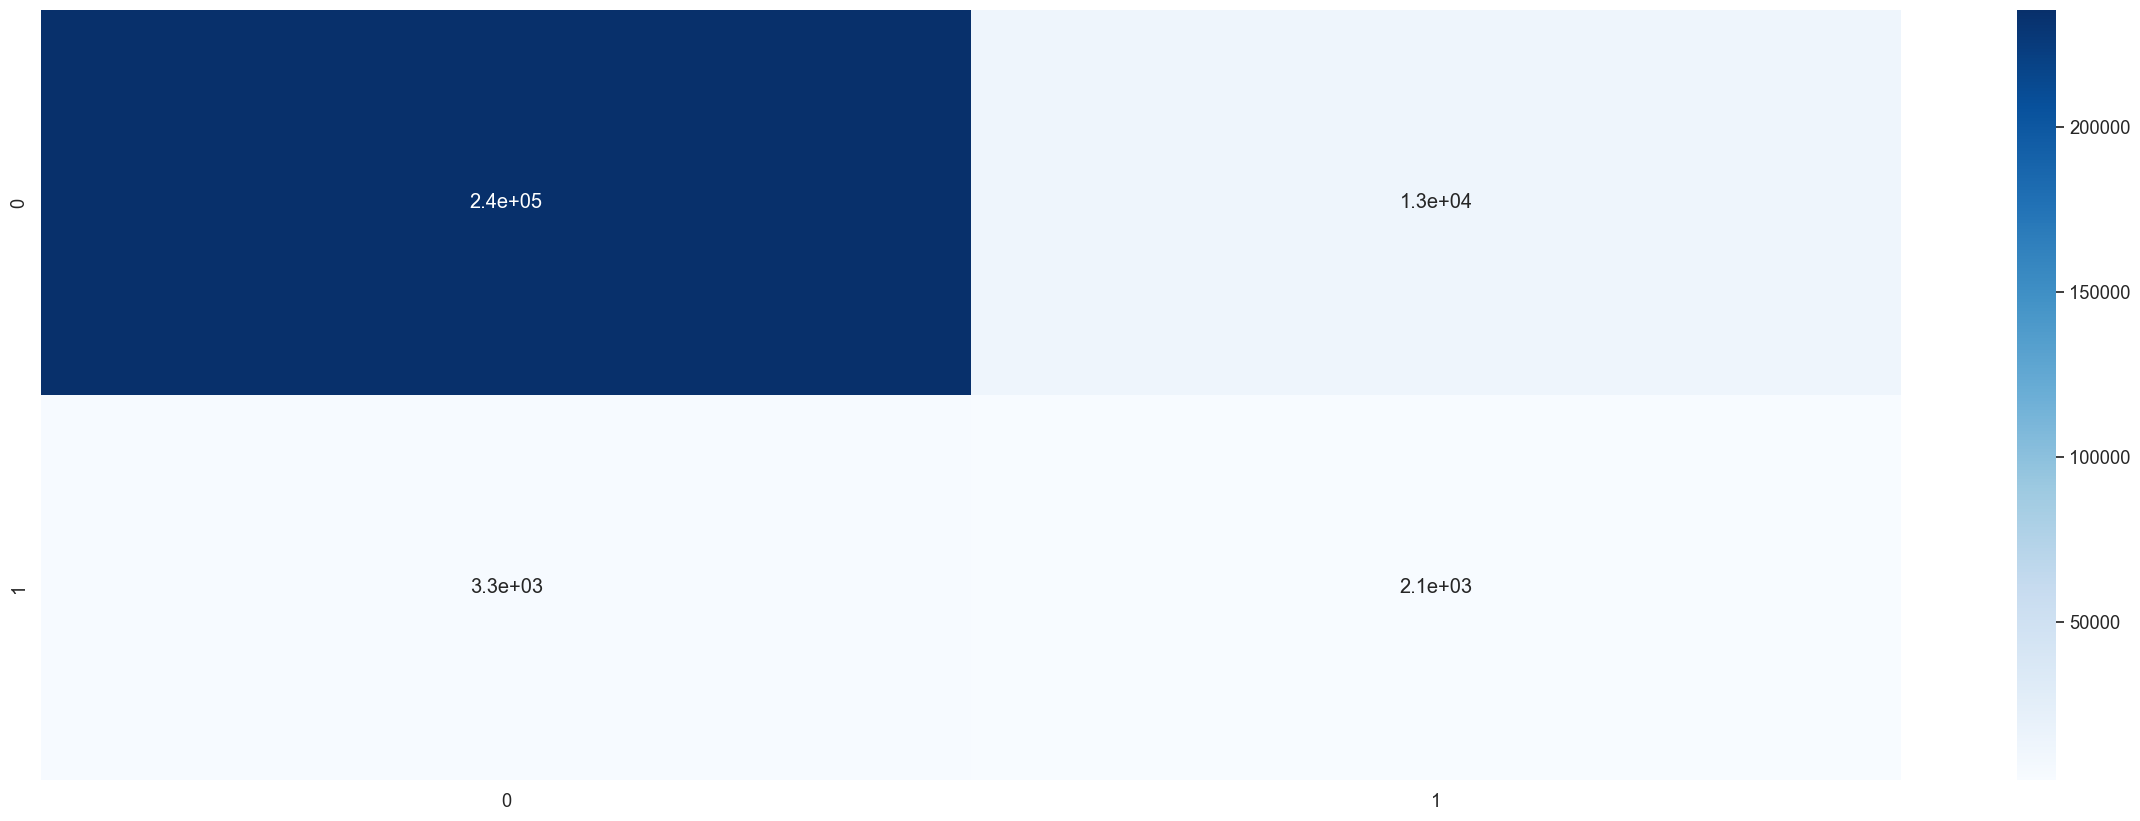

In [131]:
graph_confusion_matrix(clf_MLP_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=True)

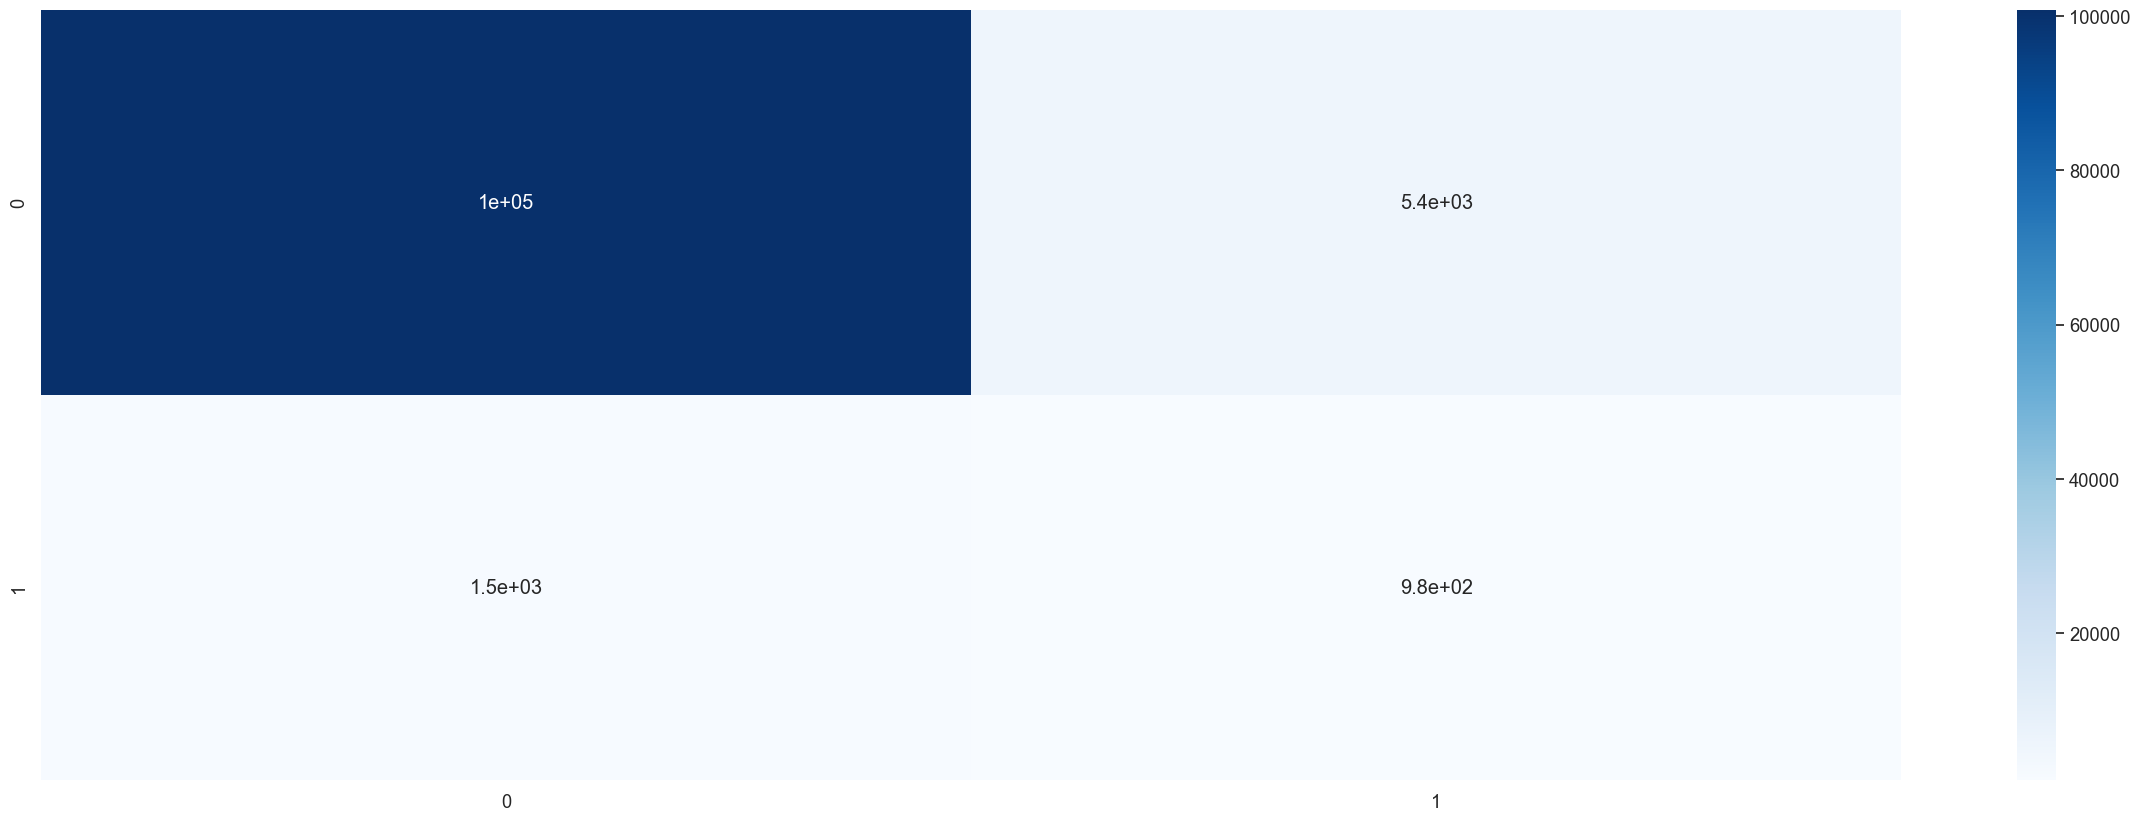

In [132]:
graph_confusion_matrix(clf_MLP_comments, X_comments_train, y_comments_train, X_comments_test, y_comments_test, train=False)

### Resultados de MLP

Accuracy del 94% para entrenamiento y pruebas, con una mala identificación de clases.

## - ratings_disabled

<b>Balancear la variable objetivo</b>

In [108]:
# obtenemos el número de muestras por clase
class_distribution = Counter(y_ratings_train['ratings_disabled'])
class_distribution

Counter({False: 248855, True: 4743})

In [109]:
class_counts = np.array(list(class_distribution.values()))
class_counts

array([248855,   4743])

In [110]:
# calculamos los percentiles superior e inferior que van a definir las clases a modificar
perc_sup = 60
perc_inf = 40
percentile_sup = np.percentile(class_counts, perc_sup)
percentile_inf = np.percentile(class_counts, perc_inf)

print(f"Percentil {perc_sup}: {percentile_sup}, Percentil {perc_inf}: {percentile_inf}")

Percentil 60: 151210.2, Percentil 40: 102387.8


In [111]:
# definimos las estrategias de oversampling y undersampling
oversample_strategy = {cls: int(percentile_inf) for cls, count in class_distribution.items() if count < percentile_inf}
undersample_strategy = {cls: int(percentile_sup) for cls, count in class_distribution.items() if count > percentile_sup}

In [112]:
# SMOTE utiliza el parámetro n_neighbors por defecto a 5, vamos a comprobar si el número mínimo de muestras de las clases es inferior o igual a este valor, en cuyo caso hay que reducirlo
# valor mínimo de muestras de las clases
min_samples_class = y_ratings_train.value_counts().min()
print(min_samples_class)

# se selecciona el n_neighbors necesario
n_neighbors = min(min_samples_class - 1, 5)
print(n_neighbors)

4743
5


In [113]:
# SMOTE para oversampling en las clases minoritarias
smote = SMOTE(sampling_strategy=oversample_strategy, random_state=42, k_neighbors=n_neighbors)

X_ratings_train_over, y_ratings_train_over = smote.fit_resample(X_ratings_train, y_ratings_train)

In [114]:
# RandomUnderSampler para las clases mayoritarias
undersampler = RandomUnderSampler(sampling_strategy=undersample_strategy, random_state=42)

X_ratings_train_balanced, y_ratings_train_balanced = undersampler.fit_resample(X_ratings_train_over, y_ratings_train_over)

<b>Muestreo de los datos balanceados</b>

In [115]:
# porcentaje de muestreo
sample_size = 0.2

# muestreo del conjunto de entrenamiento
X_ratings_train_sampled, _, y_ratings_train_sampled, _ = train_test_split(X_ratings_train_balanced, y_ratings_train_balanced, train_size=sample_size, random_state=42)

### Randomized Search

In [116]:
clf_MLP_ratings = MLPClassifier(random_state=42, verbose=True)

In [117]:
hidden_layer_sizes_rs_MLP_ratings = [(100,), (100, 100)]   # (100,) / tamaño capas ocultas
activation_rs_MLP_ratings = ['relu', 'logistic', 'identity']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_rs_MLP_ratings = [0.0001, 0.001]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_rs_MLP_ratings = ['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_rs_MLP_ratings = ['constant', 'invscaling']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_rs_MLP_ratings = [200, 300]   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_rs_MLP_ratings = [True]   # True: baraja aleatoriamente los datos
early_stopping_rs_MLP_ratings = [True]
n_iter_no_change_rs_MLP_ratings = [10, 20]   # 10 / uso con early_stopping

random_grid_rs_MLP_ratings = {'hidden_layer_sizes': hidden_layer_sizes_rs_MLP_ratings, 'activation': activation_rs_MLP_ratings, 'alpha': alpha_rs_MLP_ratings, \
                              'batch_size': batch_size_rs_MLP_ratings, 'learning_rate': learning_rate_rs_MLP_ratings, 'max_iter': max_iter_rs_MLP_ratings, \
                              'shuffle': shuffle_rs_MLP_ratings, 'early_stopping': early_stopping_rs_MLP_ratings, 'n_iter_no_change': n_iter_no_change_rs_MLP_ratings}

In [118]:
print('Iterando...')

MLP_rscv_ratings = RandomizedSearchCV(estimator=clf_MLP_ratings, param_distributions=random_grid_rs_MLP_ratings, scoring=None, n_iter=20, cv=5, verbose=1, random_state=42, n_jobs=-1, error_score='raise')
MLP_rscv_ratings.fit(X_ratings_train_balanced, np.ravel(y_ratings_train_balanced))

best_params_MLP_rscv_ratings = MLP_rscv_ratings.best_params_
print(f"Best paramters: {best_params_MLP_rscv_ratings})")

Iterando...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Iteration 1, loss = 17.09602869
Validation score: 0.596254
Iteration 2, loss = 16.47719552
Validation score: 0.602721
Iteration 3, loss = 16.14705728
Validation score: 0.591680
Iteration 4, loss = 15.61671366
Validation score: 0.543218
Iteration 5, loss = 15.11555431
Validation score: 0.604062
Iteration 6, loss = 14.71906342
Validation score: 0.596372
Iteration 7, loss = 14.17187704
Validation score: 0.578352
Iteration 8, loss = 13.62114380
Validation score: 0.600868
Iteration 9, loss = 13.14384006
Validation score: 0.604968
Iteration 10, loss = 11.75885812
Validation score: 0.602997
Iteration 11, loss = 11.26934276
Validation score: 0.602484
Iteration 12, loss = 9.77340085
Validation score: 0.600434
Iteration 13, loss = 9.32708812
Validation score: 0.502603
Iteration 14, loss = 7.96793800
Validation score: 0.597476
Iteration 15, loss = 7.56269506
Validation score: 0.532453
Iteration 16, loss = 6.41661940
Validat

C:\Users\Enrique\anaconda3\envs\atrium\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Grid Search

In [119]:
hidden_layer_sizes_gs_MLP_ratings = [(100, 100), (100, 100, 100)]   # (100,) / tamaño capas ocultas
activation_gs_MLP_ratings = ['identity']   #'relu': función de activación; ‘identity’, ‘logistic’, ‘tanh’
alpha_gs_MLP_ratings = [0.0001]   # 0.0001 / coef. de regularización L2, controla el sobreajuste (mayor > aprendizaje conservador, menor prob. sobreajuste)
batch_size_gs_MLP_ratings = ['auto']   # 'auto': tamaño de los lotes en que se divide el dataset; menor, más preciso pero más lento; 'auto': batch_size=min(200, n_samples)
learning_rate_gs_MLP_ratings = ['invscaling']   # 'constant' / ritmo de aprendizaje; invscaling: disminuye la tasa de aprendizaje a medida que avanzan las iteraciones; adaptive: tasa constante, se reduce si el error en la validación deja de mejorar
max_iter_gs_MLP_ratings = range(150, 251, 50)   # 200: número de épocas (cuántas veces se utiliza cada punto de datos), no número de pasos del gradiente
shuffle_gs_MLP_ratings = [True]   # True: baraja aleatoriamente los datos
early_stopping_gs_MLP_ratings = [True]
n_iter_no_change_gs_MLP_ratings = range(10, 31, 10)   # 10 / uso con early_stopping

random_grid_gs_MLP_ratings = {'hidden_layer_sizes': hidden_layer_sizes_gs_MLP_ratings, 'activation': activation_gs_MLP_ratings, 'alpha': alpha_gs_MLP_ratings, \
                               'batch_size':batch_size_gs_MLP_ratings, 'learning_rate': learning_rate_gs_MLP_ratings, 'max_iter': max_iter_gs_MLP_ratings, \
                               'shuffle': shuffle_gs_MLP_ratings, 'early_stopping': early_stopping_gs_MLP_ratings, 'n_iter_no_change': n_iter_no_change_gs_MLP_ratings}

In [120]:
print('Iterando...')

MLP_gscv_ratings = GridSearchCV(estimator=clf_MLP_ratings, param_grid=random_grid_gs_MLP_ratings, scoring=None, cv=5, verbose=1, n_jobs=-1, error_score='raise')
MLP_gscv_ratings.fit(X_ratings_train_balanced, np.ravel(y_ratings_train_balanced))

best_params_MLP_gscv_ratings = MLP_gscv_ratings.best_params_
print(f"Best parameters: {best_params_MLP_gscv_ratings}")

Iterando...
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Iteration 1, loss = 15.58865632
Validation score: 0.413880
Iteration 2, loss = 8.00352288
Validation score: 0.541877
Iteration 3, loss = 2.83261228
Validation score: 0.605402
Iteration 4, loss = 1.86011723
Validation score: 0.588289
Iteration 5, loss = 0.65176907
Validation score: 0.643573
Iteration 6, loss = 1.73945162
Validation score: 0.613722
Iteration 7, loss = 0.64701313
Validation score: 0.648147
Iteration 8, loss = 2.29179503
Validation score: 0.580047
Iteration 9, loss = 0.63293534
Validation score: 0.526932
Iteration 10, loss = 0.66971921
Validation score: 0.596845
Iteration 11, loss = 1.99821810
Validation score: 0.675789
Iteration 12, loss = 0.63589911
Validation score: 0.596254
Iteration 13, loss = 2.23986788
Validation score: 0.659069
Iteration 14, loss = 0.62019950
Validation score: 0.632058
Iteration 15, loss = 1.46381278
Validation score: 0.595071
Iteration 16, loss = 0.64178263
Validation score: 

### MLP

In [121]:
print('Iterando...')

clf_MLP_ratings = MLPClassifier(**best_params_MLP_gscv_ratings)
clf_MLP_ratings.fit(X_ratings_train_balanced, np.ravel(y_ratings_train_balanced))

print('Acabado')

Iterando...
Acabado


<b>Evalucación</b>

In [122]:
print_score(clf_MLP_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=True)

Train Result:
Accuracy Score: 92.83%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       0.991696     0.146966  0.928347       0.569331       0.975897
recall          0.934809     0.589289  0.928347       0.762049       0.928347
f1-score        0.962413     0.235259  0.928347       0.598836       0.948813
support    248855.000000  4743.000000  0.928347  253598.000000  253598.000000


In [123]:
print_score(clf_MLP_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=False)

Test Result:
Accuracy Score: 92.56%
_______________________________________________
CLASSIFICATION REPORT:
                   False         True  accuracy      macro avg   weighted avg
precision       0.992192     0.143896  0.925638       0.568044       0.976512
recall          0.931568     0.610752  0.925638       0.771160       0.925638
f1-score        0.960925     0.232916  0.925638       0.596920       0.947468
support    106676.000000  2009.000000  0.925638  108685.000000  108685.000000


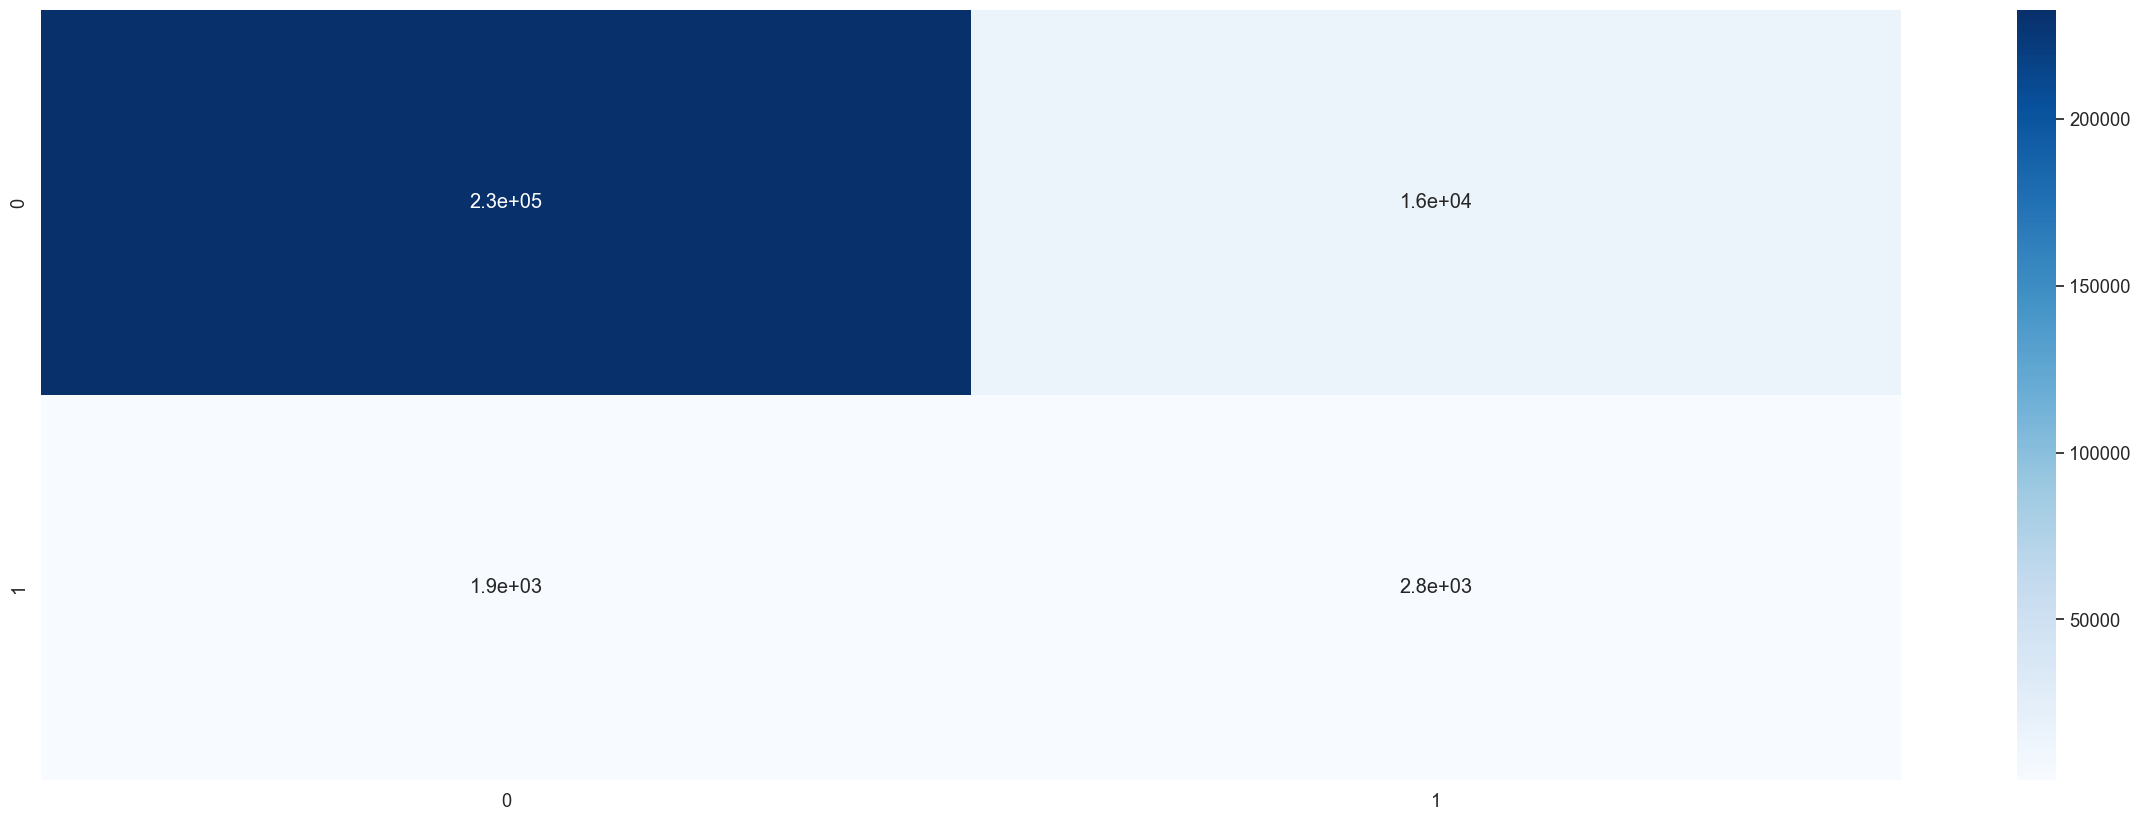

In [124]:
graph_confusion_matrix(clf_MLP_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=True)

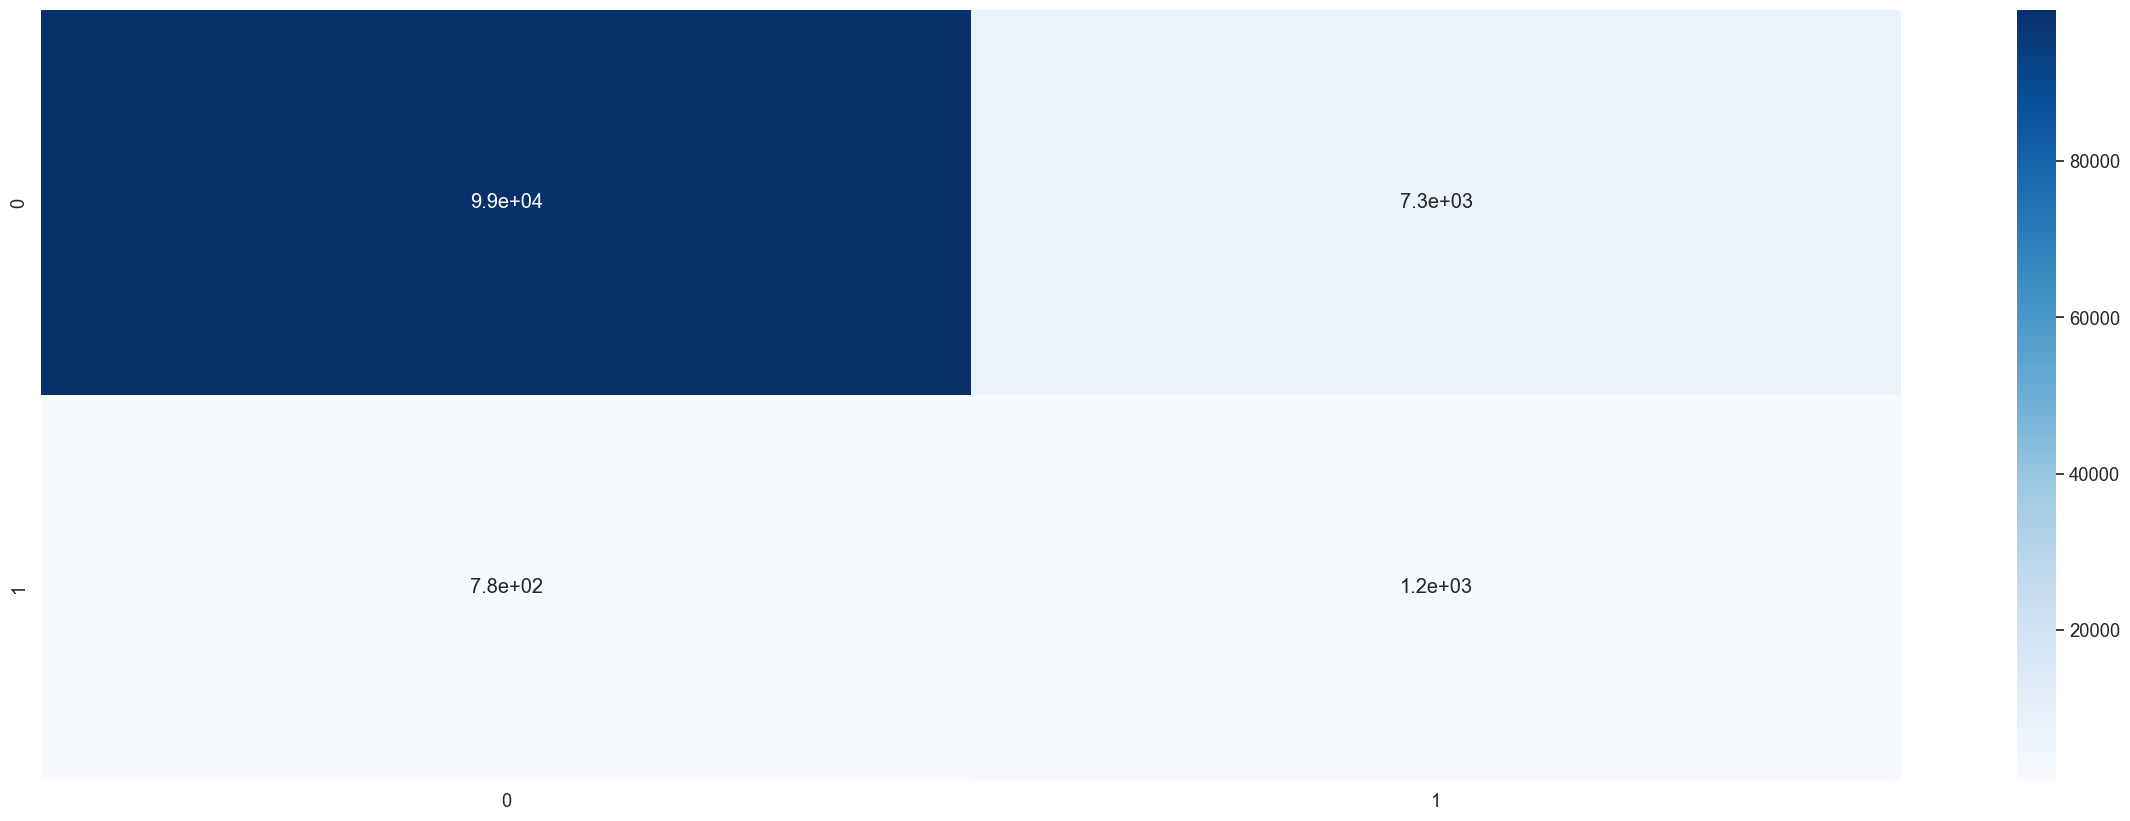

In [125]:
graph_confusion_matrix(clf_MLP_ratings, X_ratings_train, y_ratings_train, X_ratings_test, y_ratings_test, train=False)

### Resultados de MLP

Accuracy del 92% con una mala distinción de clases.

# Conclusiones

Se va a industrializar Random Forest con todas las características, ya que obtiene los mejores resultados tanto para comments_disabled como para ratings_disabled.

Por otra parte, dado que MLP no me ha ofrecido los mejores resultados en ninguno de los problemas planteados, voy a industrializar también MLP para comments_disabled, que es donde las métricas de MLP son más altas.